# Game Winner Prediction

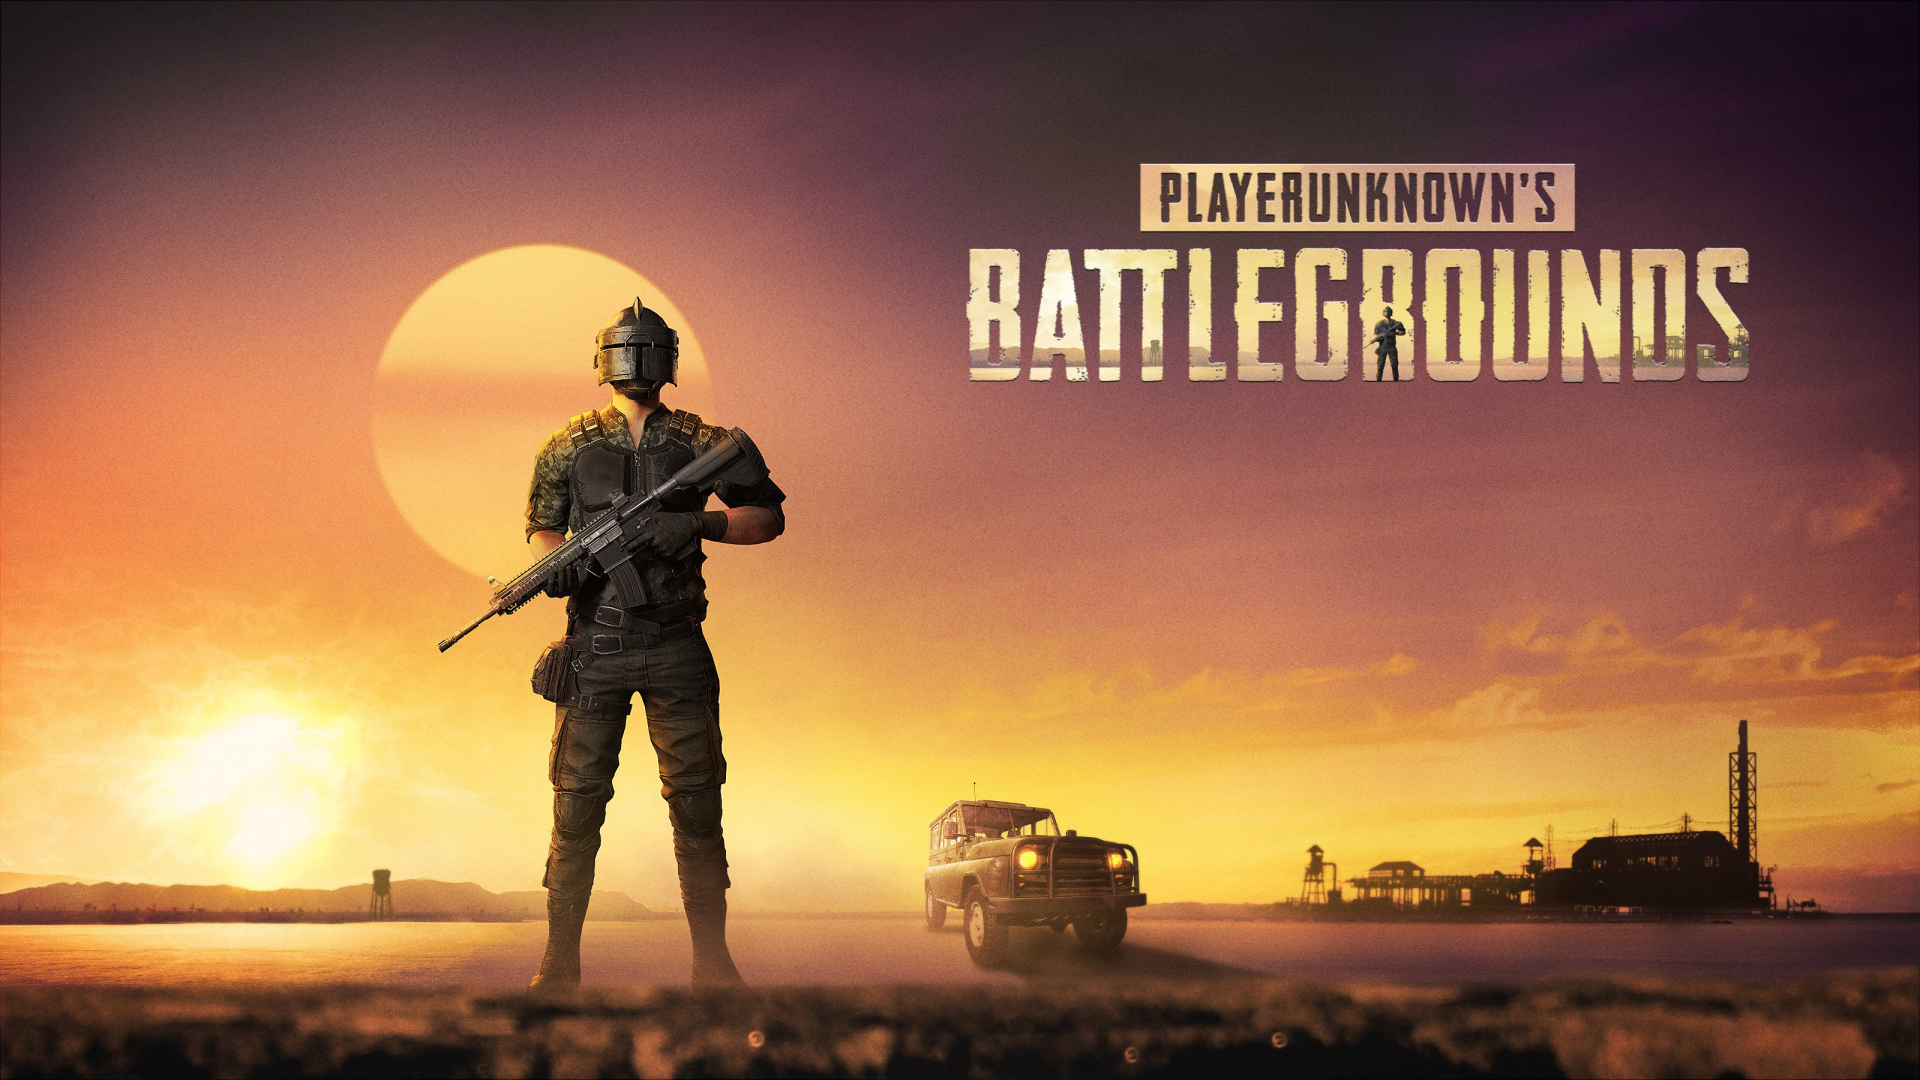


## Bussiness Case

Game winner prediction aims to create a machine learning model to predict the probabilty of winning Pubg match.

# Task -1

## Domain Analysis

### Data Attributes

 - **Id :** Player's Id.  
 - **Group Id :** To identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
 - **Match Id :** ID to identify match. There are no matches that are in both the training and testing set.     
 - **Assists :** No.of enemy players this player damaged that were killed by teammates.  
 - **Boosts :** No.of boost items used.  
 - **DamageDealt :** Total damage dealt .(Note:Self inflicted damagedis subtracted)   
 - **DBNOs :** No.of enemy players knocked.    
 - **Headshotkills:** NO.of enemy players killed with Headshots.  
 - **Heals :** No.of Healing items used.   
 - **Killplace :** Ranking in match of no.of enemy players killed.  
 - **killPoints :** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  
 - **Kills :** No. of enemy players killed.    
 - **KillStreaks :** Max no. of enemy players killed in a short amount of time.  
 - **LongestkKill :** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
 - **MatchDuration :** Duration of match in seconds.  
 - **MatchType :**  String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  
 - **Maxplace :**   Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
 - **numGroups :**  Number of groups we have data for in the match.  
 - **RankPoints :**  Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.  
 - **Revives :**  No of times this player revived teammates.    
 - **RideDistance :** Total distance traveled in vehicles measured in meters.  
 - **Roadkills :** No.of kills while in a vechicle.  
 - **SwimDistance :** Total distance traveled by swimming measured in meters.  
 - **TeamKills :** No.of times this player killed a teammate.  
 - **VechicleDestroys**  No.od vechicles destroyed.  
 - **Walk Distance :**  Total distance traveled on foot measured in meters.
 - **Weapons Acquried :** No.of weapond picked.  
 - **Win Points :** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.   
 - **Win Place Perc :** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.  
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [3]:
df=pd.read_csv('pubg.csv')
df

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0               0.00      0              0      0         60  ...        0   
1              91.47      0              0      0         57  ...        0   
2              68.00      0              0      0         47  ...        0   
3              32.90      0              0      0         75  ...        0   
4             100.00      0              0      0         45  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
4446961         0.00      0              0      0         74  ...        0   
4446962        44.15      0              0      0         69  ...        0   
4446963        59.06      0              0      0         66  ...        0   
4446964       180.40      1              1      2         11  ...        2   
4446965       268.00      0              0      1         18  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0              0.0000          0         0.000          0               0   
1              0.0045          0        11.040          0               0   
2              0.0000          0         0.000          0               0   
3              0.0000          0         0.000          0               0   
4              0.0000          0         0.000          0               0   
...               ...        ...           ...        ...             ...   
4446961     1292.0000          0         0.000          0               0   
4446962        0.0000          0         0.000          0               0   
4446963        0.0000          0         2.184          0               0   
4446964        0.0000          0         0.000          0               0   
4446965     1369.0000          0         0.000          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0              244.80                1       1466        0.4444  
1             1434.00                5          0        0.6400  
2              161.80                2          0        0.7755  
3              202.70                3          0        0.1667  
4               49.75                2          0        0.1875  
...               ...              ...        ...           ...  
4446961       1019.00                3       1507        0.1786  
4446962         81.70                6          0        0.2935  
4446963        788.70                4          0        0.4815  
4446964       2748.00                8          0        0.8000  
4446965       1244.00                5          0        0.5464  

[4446966 rows x 29 columns]

In [4]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
df=reduce_mem_usage(df)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


#### Basic Checks

In [6]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [7]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0     0.000000      0              0      0         60  ...        0   
1    91.470001      0              0      0         57  ...        0   
2    68.000000      0              0      0         47  ...        0   
3    32.900002      0              0      0         75  ...        0   
4   100.000000      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0    244.800003                1       1466        0.4444  
1   1434.000000                5          0        0.6400  
2    161.800003                2          0        0.7755  
3    202.699997                3          0        0.1667  
4     49.750000                2          0        0.1875  

[5 rows x 29 columns]

In [8]:
df.tail()

Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
4446961     0.000000      0              0      0         74  ...        0   
4446962    44.150002      0              0      0         69  ...        0   
4446963    59.060001      0              0      0         66  ...        0   
4446964   180.399994      1              1      2         11  ...        2   
4446965   268.000000      0              0      1         18  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
4446961        1292.0          0         0.000          0               0   
4446962           0.0          0         0.000          0               0   
4446963           0.0          0         2.184          0               0   
4446964           0.0          0         0.000          0               0   
4446965        1369.0          0         0.000          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
4446961   1019.000000                3       1507        0.1786  
4446962     81.699997                6          0        0.2935  
4446963    788.700012                4          0        0.4815  
4446964   2748.000000                8          0        0.8000  
4446965   1244.000000                5          0        0.5464  

[5 rows x 29 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

From the above information we can see that the dataset contains 6 columns with float values, 4 columns with categorical values and the rest contain integer values.

In [10]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307172e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.698869e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   ...  1.646590e-01  6.061160e+02  3.496091e-03  4.509323e+00   
std    ...  4.721671e-01  1.496470e+03  7.337297e-02  3.023784e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  4.446966e+06     4.446966e+06  4.446966e+06     4.446966e+06   
mean   2.386841e-02     7.918208e-03  1.154218e+03     3.660488e+00   
std    1.673935e-01     9.261157e-02  1.180553e+03     2.456544e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.551000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.856000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.976000e+03     5.000000e+00   
max    1.200000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  4.446966e+06  4.446965e+06  
mean   6.064601e+02  4.728218e-01  
std    7.397004e+02  3.068041e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.013000e+03  1.000000e+00  

[8 rows x 25 columns]

In [11]:
df.describe(include='O')

Id         groupId         matchId  matchType
count          4446966         4446966         4446966    4446966
unique         4446966         2026745           47965         16
top     7f96b2f878858a  14d6b54cdec6bc  4b5db40aec4797  squad-fpp
freq                 1              74             100    1756186

In [12]:
df.nunique()

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

## EDA

In [13]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [14]:
df1=df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]                       #Numerical data

In [15]:
df1_part_1 = df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints']]

In [16]:
df1_part_2 = df[['kills','killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives']]

In [17]:
df1_part_3 = df[['rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]

In [18]:
df2=df[['Id','groupId','matchId','matchType']]  # Categorical data
df2

Id         groupId         matchId  matchType
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91  squad-fpp
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c  squad-fpp
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        duo
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e  squad-fpp
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6   solo-fpp
...                 ...             ...             ...        ...
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635  squad-fpp
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9       solo
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab  squad-fpp
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a  squad-fpp
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c   solo-fpp

[4446966 rows x 4 columns]

### Univariate Analysis

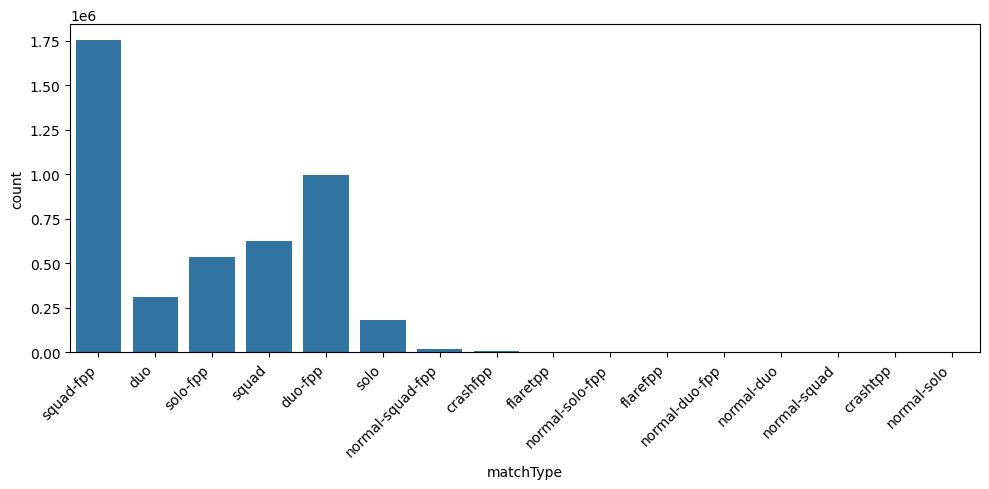

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x=df['matchType'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

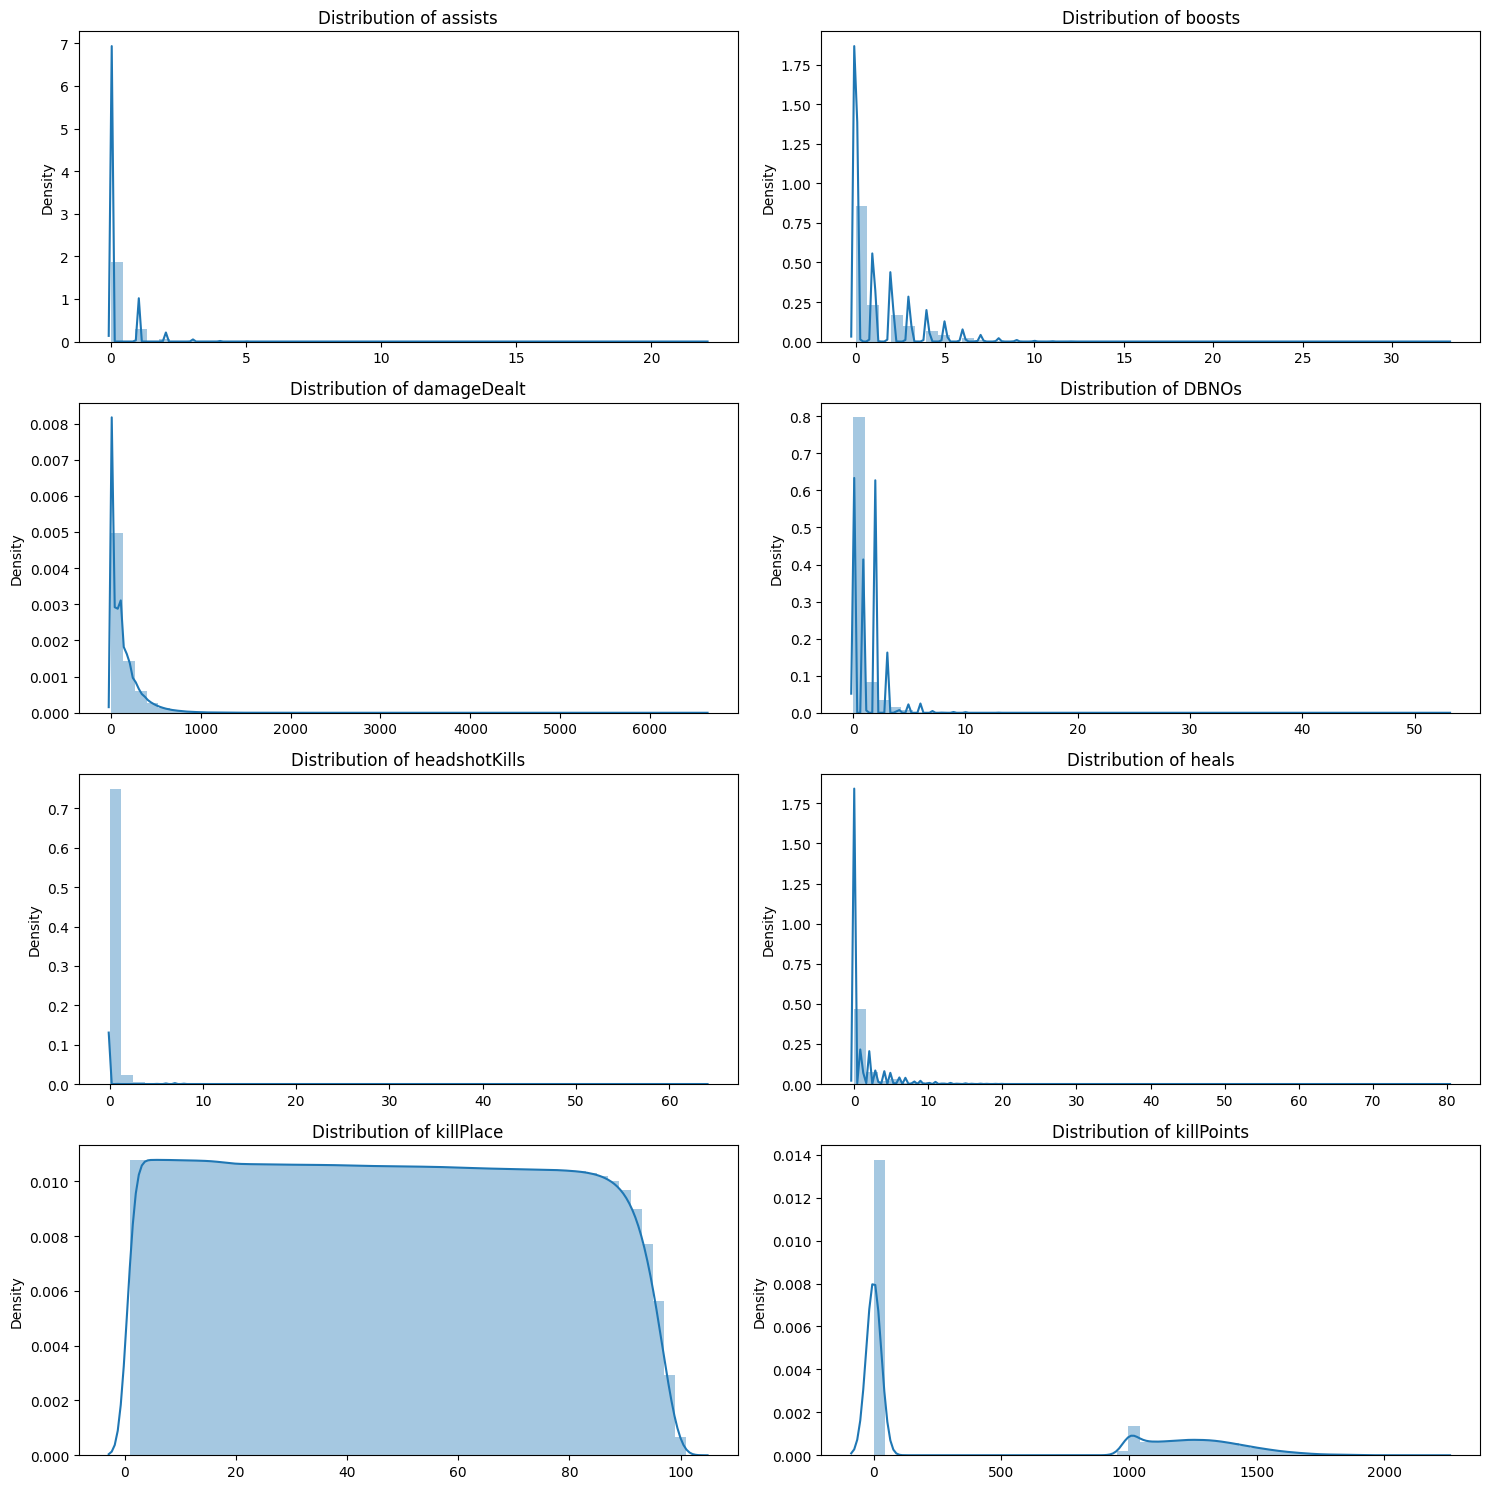

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df1_part_1:
    plt.subplot(4,2,plotnumber)
    sns.distplot(x=df1_part_1[i])
    plt.title(f'Distribution of {i}')  # Add title
    plotnumber = plotnumber + 1

plt.tight_layout()

**Assists** : We can see that majority of players tend to have 1-2 assists per each match , with fewer players achieving having higher assist.

**Boosts** : The graph shows that the majority of players used 0 boosts in the game, with a smaller number of players using 1 or more boosts.

**DamageDealt** : From the above distribution we get to know that the majority of players dealt less than 1000 damage,with less no.of players dealt with higher amounts of damage

**DBNOs** : It appears that majority of people knocked out between 0 to 5, other players with less no.of players knocked out more than 5 players.

**Headshotkills** : The majority of players had 0 headshot kills, with less no.of players achieving 1 or more headshot kills.

**Heals** : we can observe that the majority of heal values are concentrated around 0 that means no healing events are occuring.

**KillPlace** : We observe that distribution of kill placements in the game the curve is centered around 40-60 on the x-axis suggesting that most kills occured in the middile of the map. There is a slight decrease in density as you move towards the edge of a map(0 and 100 from x-axis).This observation implies that players tend to get more kills in the central area of the map.

**Killpoints** : The distribution appears to be right skewed meaning that there are more occurence of lower kill points values there is aslo a tail extending towards higher values indicating that there are some instance of some very high kill points.



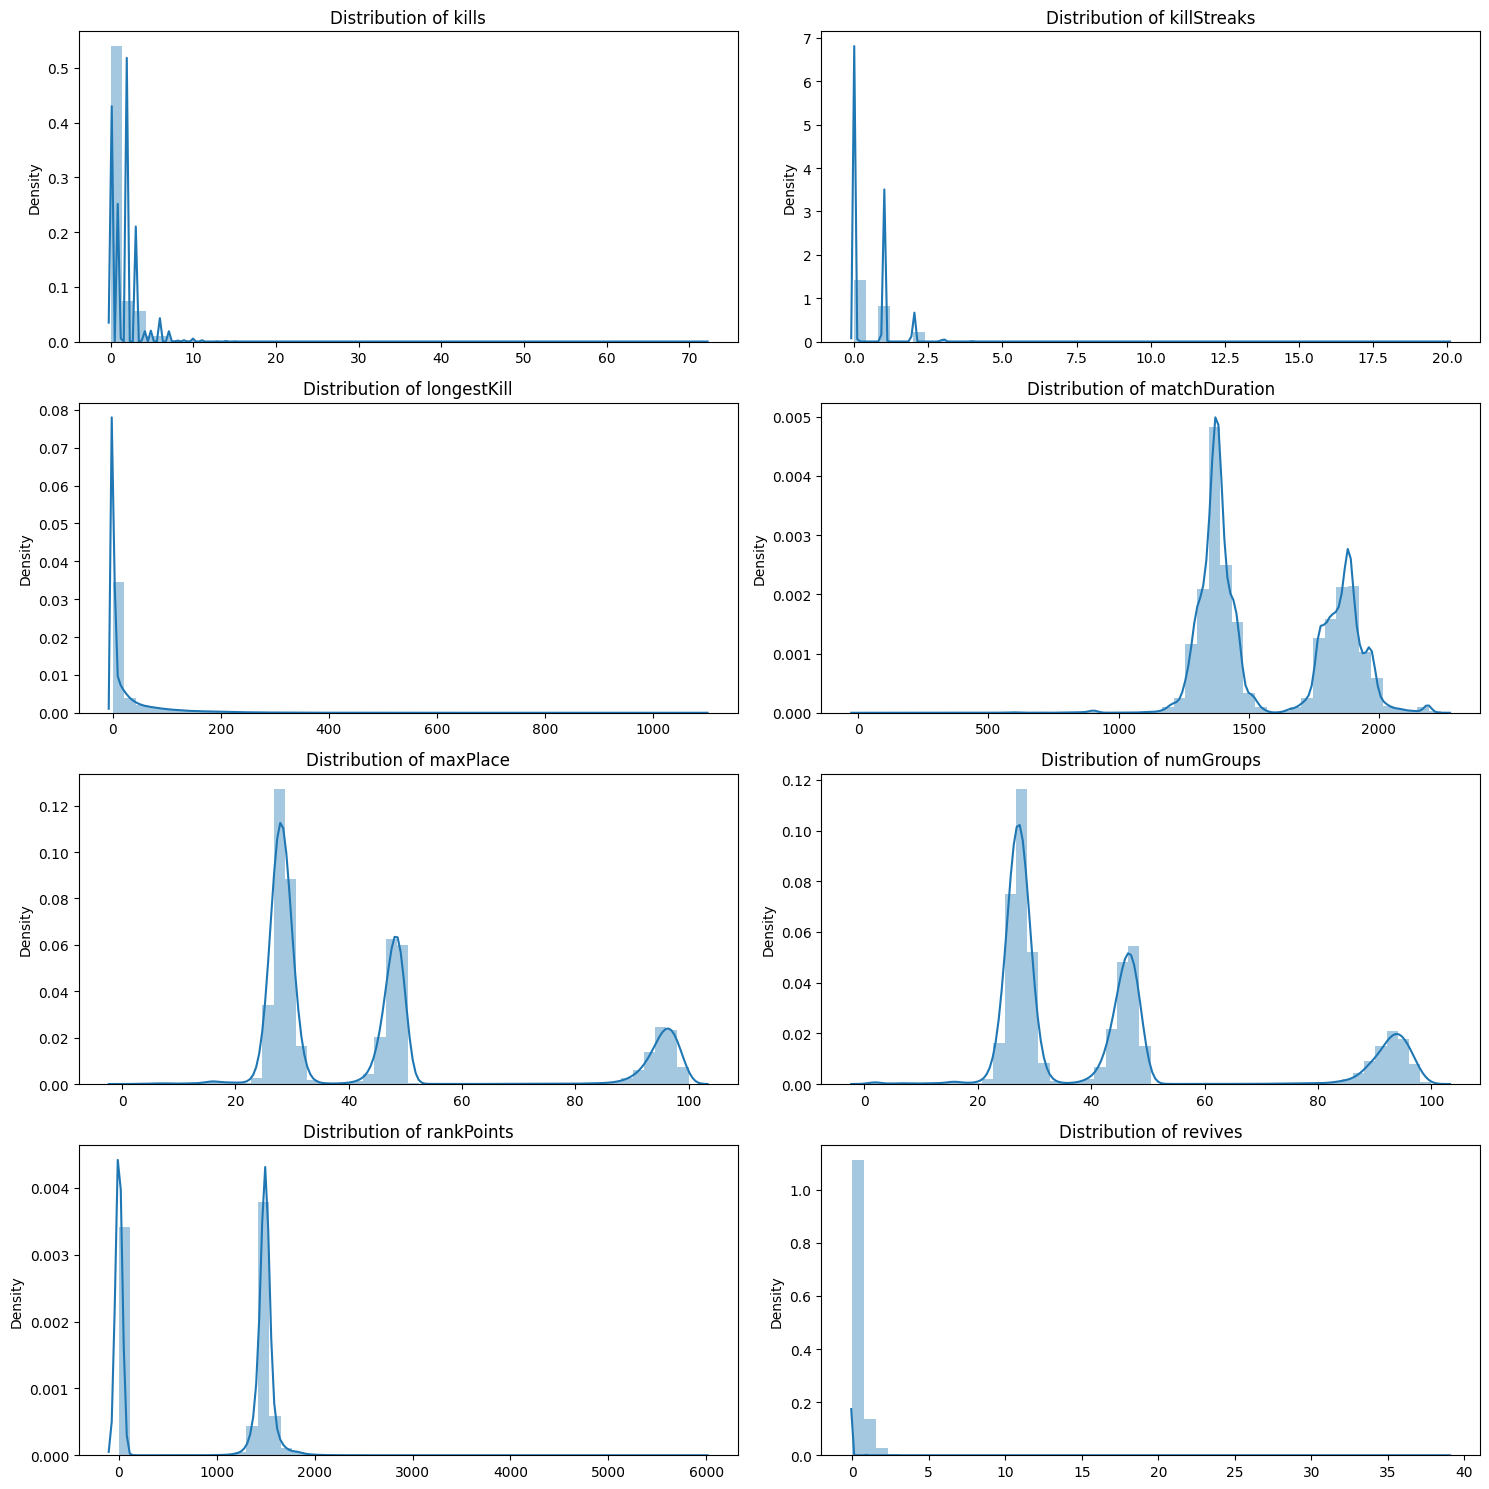

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df1_part_2:
    plt.subplot(4,2,plotnumber)
    sns.distplot(x=df1_part_2[i])
    plt.title(f'Distribution of {i}')  # Add title
    plotnumber = plotnumber + 1

plt.tight_layout()

**Kills** : The most of the values are concentrated at lower end .Higher kill counts are less common than lower kill counts. But achieving high no.of kills counts can be a siginificant factor for winning a game.

**KillStreaks** : The majority players having kill streak 0 or 1. This suggests that achieving a high killstreak is reatively rare in the game. The plot also shows that there is a small but non-eligible no.of players with high streak (5 or more) indicating that it is possible to achieve a high no.of kills in a single game.

**Longestkill** : The distribution is right skewed . We can observe that most of the values are at lower end and few outliers with high values .

**NumGroups** : The density of data points decreases as the value of the no.of groups increases, indicating that matches with a large number of groups with data available are less common than match with a smaller no.of groups with data available.

**RankPoints** : The graph shows that most of the matches having a low no.of rank points and a small no.of matches having a high no.of rank points.

**Revives** : The most of the matches having only one Revive and very less no.of matches having high no.of revives.

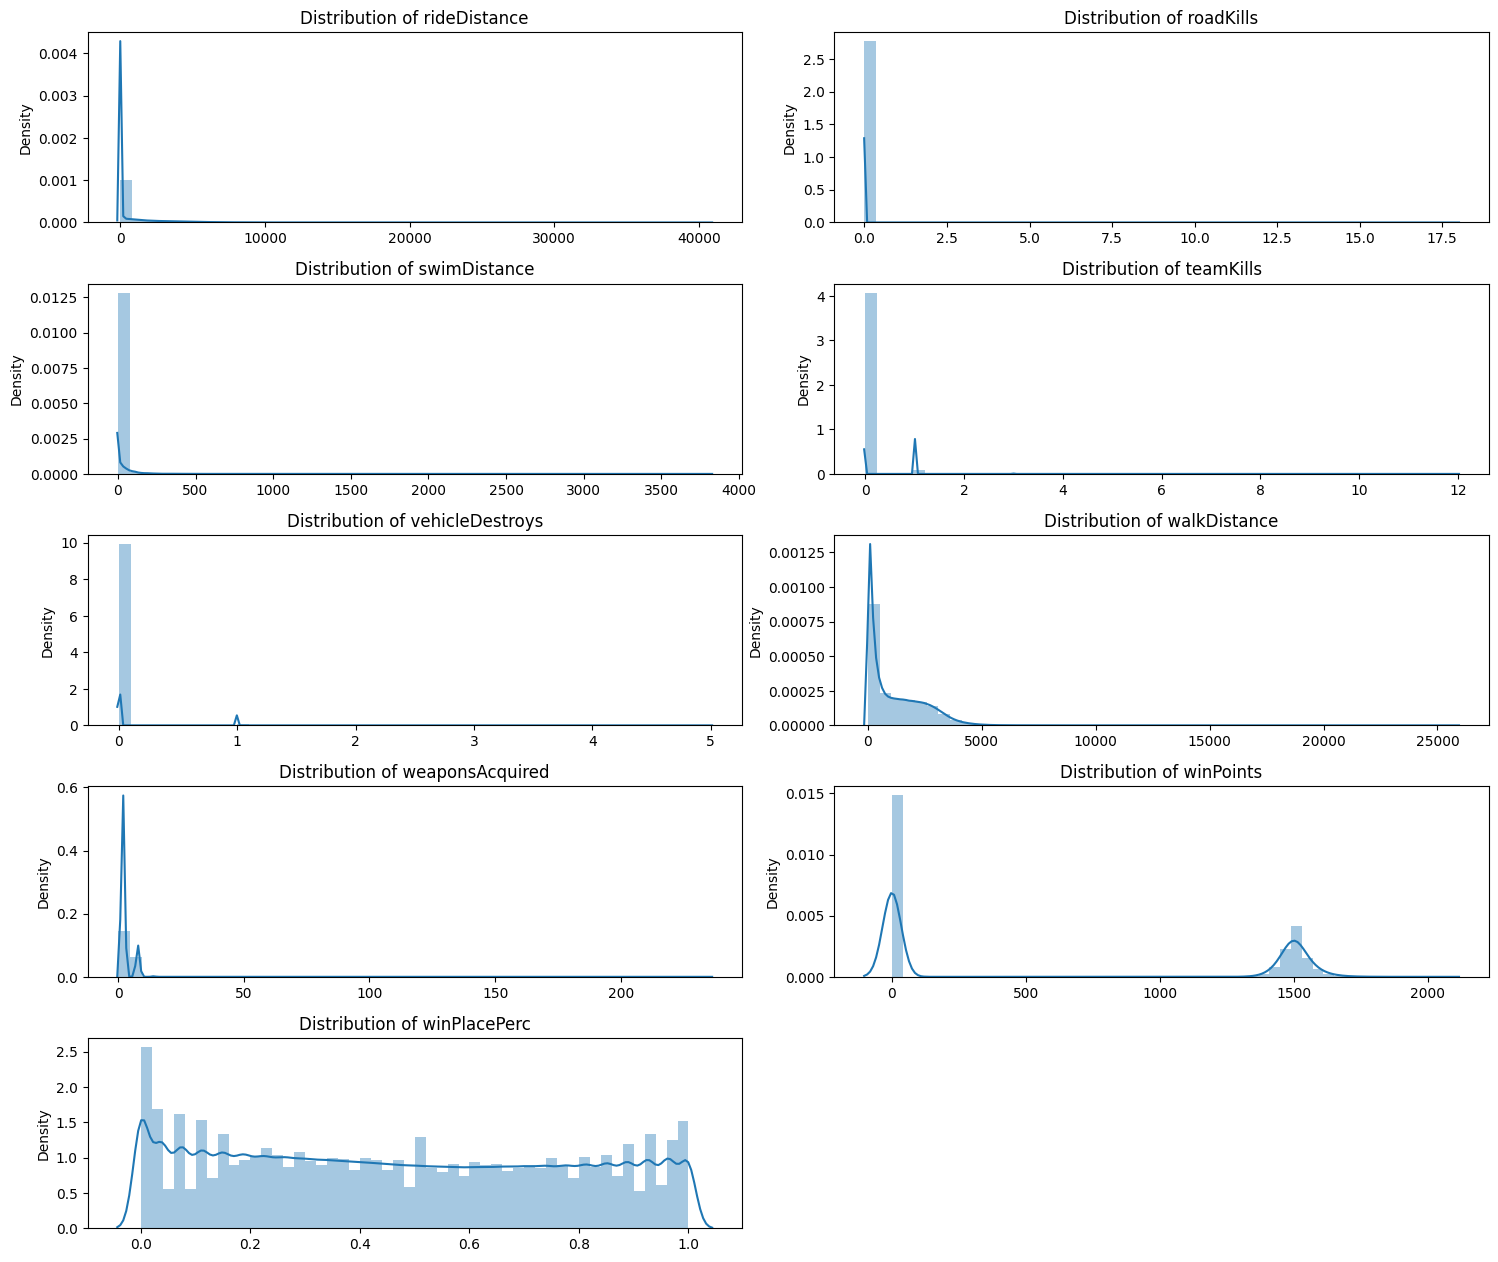

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df1_part_3:
    plt.subplot(6,2,plotnumber)
    sns.distplot(x=df1_part_3[i])
    plt.title(f'Distribution of {i}')  # Add title
    plotnumber = plotnumber + 1

plt.tight_layout()

**SwimDistance** : We get to know that majority of the players swum short distances where as less no.of people swum long distances.

**RoadKills** :

**TeamKills** :
**VehicleDestroys** : Most players destroyed only one vechicle.

**WalkDistance** : The majority of players walked short to moderate distances, with most values falling between 0 to 2000. A small no.of players walked long distances with some values excluding 4000.

**WeaponsAcquired** : It peaks sharply near 0 on the x-axis, indicating that most players acquire only a few weapons during gameplay. As the number of weapons acquired increases, the density decreases rapidly. This suggests that fewer players acquire a large number of weapons.

**WinPoints** :
One peak is near 0 win points, indicating that a significant number of players have very low win points. The other peak is around 1500 win points, suggesting that another group of players falls into this range. There is a large gap between these two peaks, where very few players have intermediate win points

**WinPlacePerc** : The x-axis represents the win place percentage, ranging from 0.0 to 1.0. The y-axis represents the count of players with each specific win place percentage. There is a significant peak at 0.0 on the x-axis, indicating that many players have a zero or very low win place percentage. These players likely haven’t won any matches. Another noticeable peak occurs near 1.0 on the x-axis, suggesting that there’s also a considerable number of players with high or perfect win percentages. These players consistently perform well and win matches..


### Bivariate Analysis

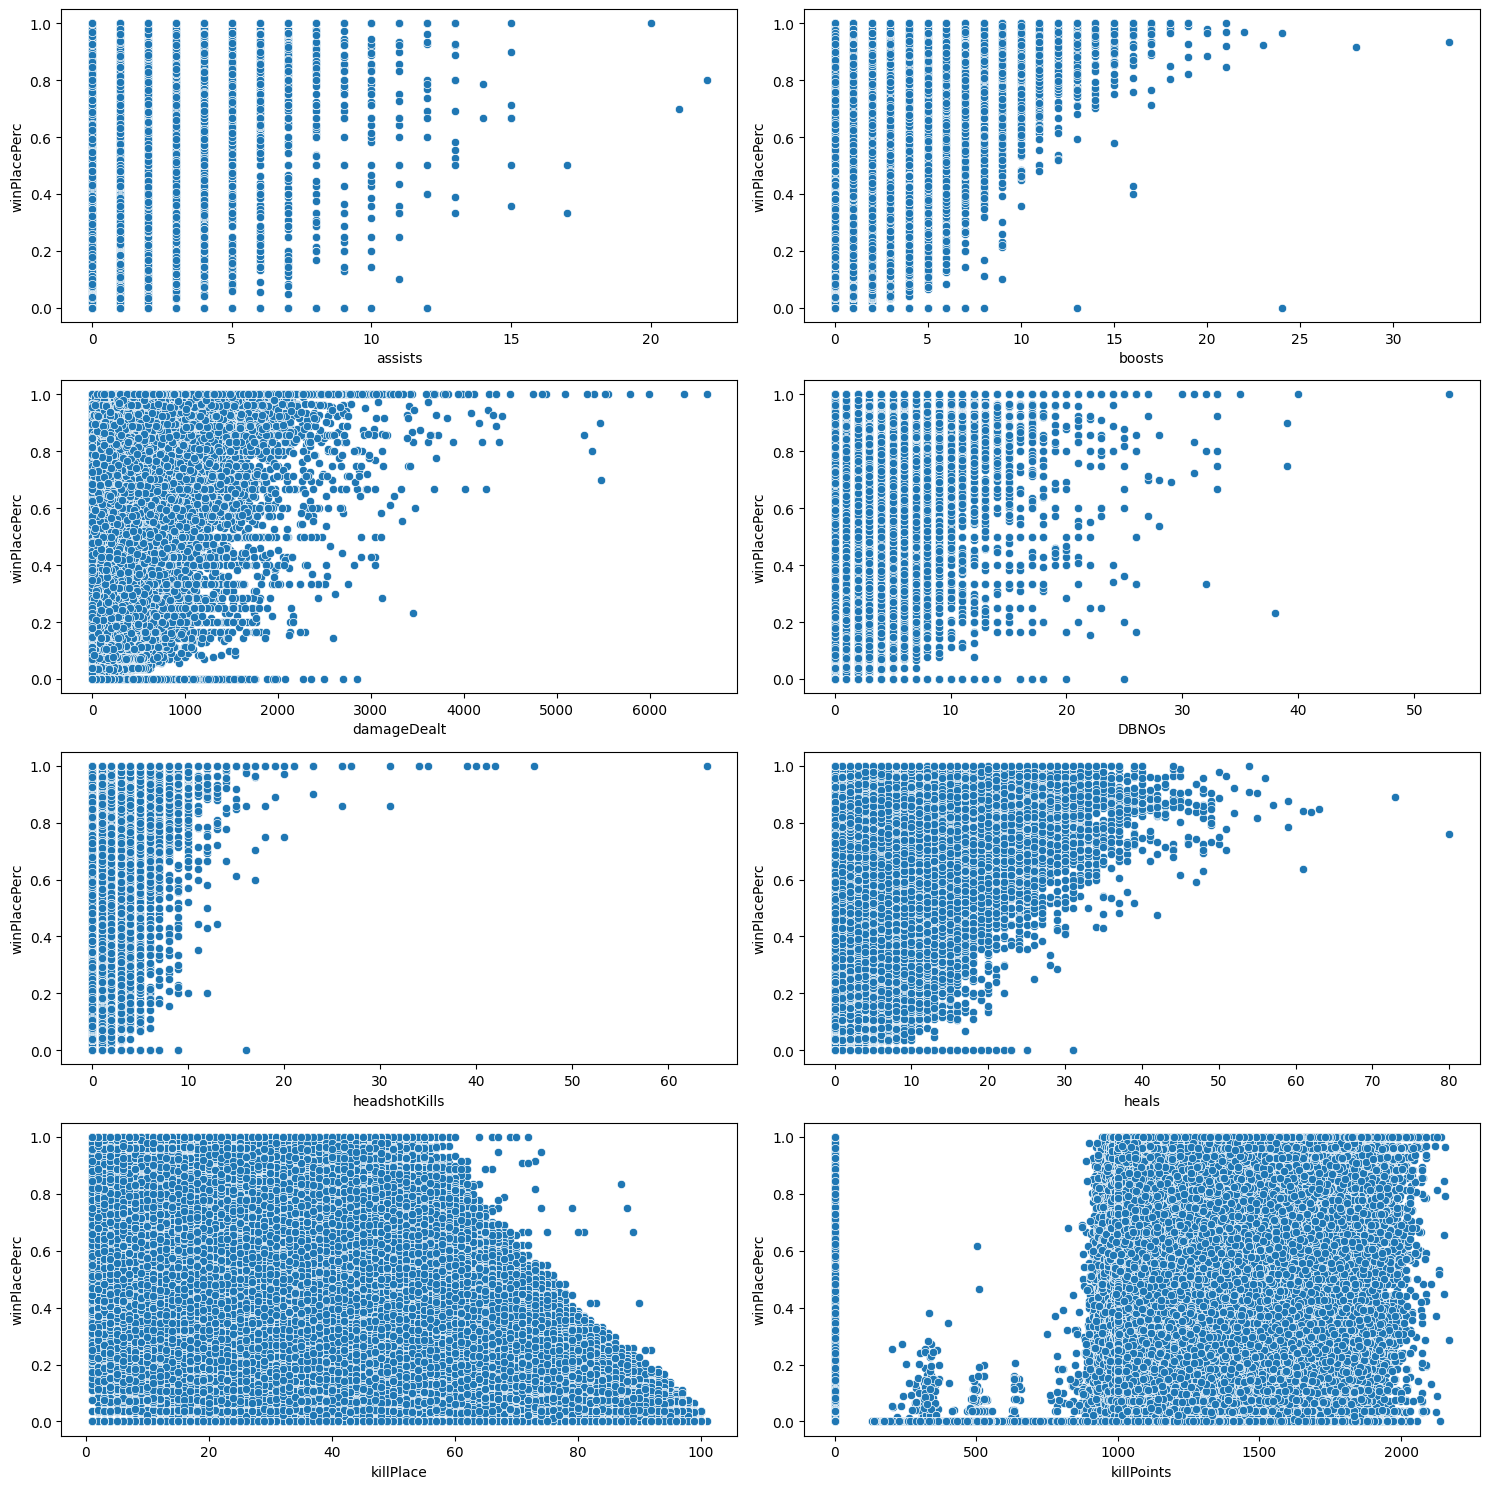

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df1_part_1:
    plt.subplot(4,2,plotnumber)
    sns.scatterplot(x=df1_part_1[i], y = df['winPlacePerc'])
    plotnumber = plotnumber + 1

plt.tight_layout()

**Assists** : Looking at the scatter plot, we can see that there is no clear linear relationship between assists and win percentage.The data points are scattered across the graph, with a higher concentration towards the lower end of assists. As the number of assists increases, the win percentage varies widely without showing a distinct trend. Some players with a low number of assists have high win percentages, while others with more assists have lower win percentages.   

**Boosts** : we can observe that as the number of boosts used increases, there is an upward trend in win percentage (winPlacePerc).Players who use more boosts tend to have higher winning percentages.The data points are scattered across the graph, but the overall trend suggests that utilizing boosts positively impacts a player’s chances of winning.

**DamageDealt** : Many dots are concentrated at the lower end of “damageDealt,” indicating instances where players dealt low damage but still achieved various win place percentages.As “damageDealt” increases, the density of dots decreases, but they spread across higher values of “winPlacePerc.”

**DBNOs(Down But Not Out)** : There is a concentration of data points towards the lower end of DBNOs (likely indicating that many players have low DBNO counts).As the number of DBNOs increases, the win percentage (winPlacePerc) varies widely.There is no strong correlation between high DBNOs and winning percentage.

**Headshotkills** : There seems to be a positive Correlation between headshot kills and win place percentage. This means that as the number of headshot kills increases, the win place percentage also tends to increase.

**Heals** : There’s a high concentration of data points at the lower end of the “heals” axis, indicating that most players tend to use a low number of heals during a game.As the number of heals increases, the frequency of such instances decreases, suggesting that it’s less common for players to use a large number of heals

**KillPlace** : This means that as KillPlace decreases (indicating a better rank in terms of kills), the win place percentage increases, suggesting a higher chance of winning.

**KillPoints** : This plot indicating that players with higher KillPoints tend to have a higher win place percentage.

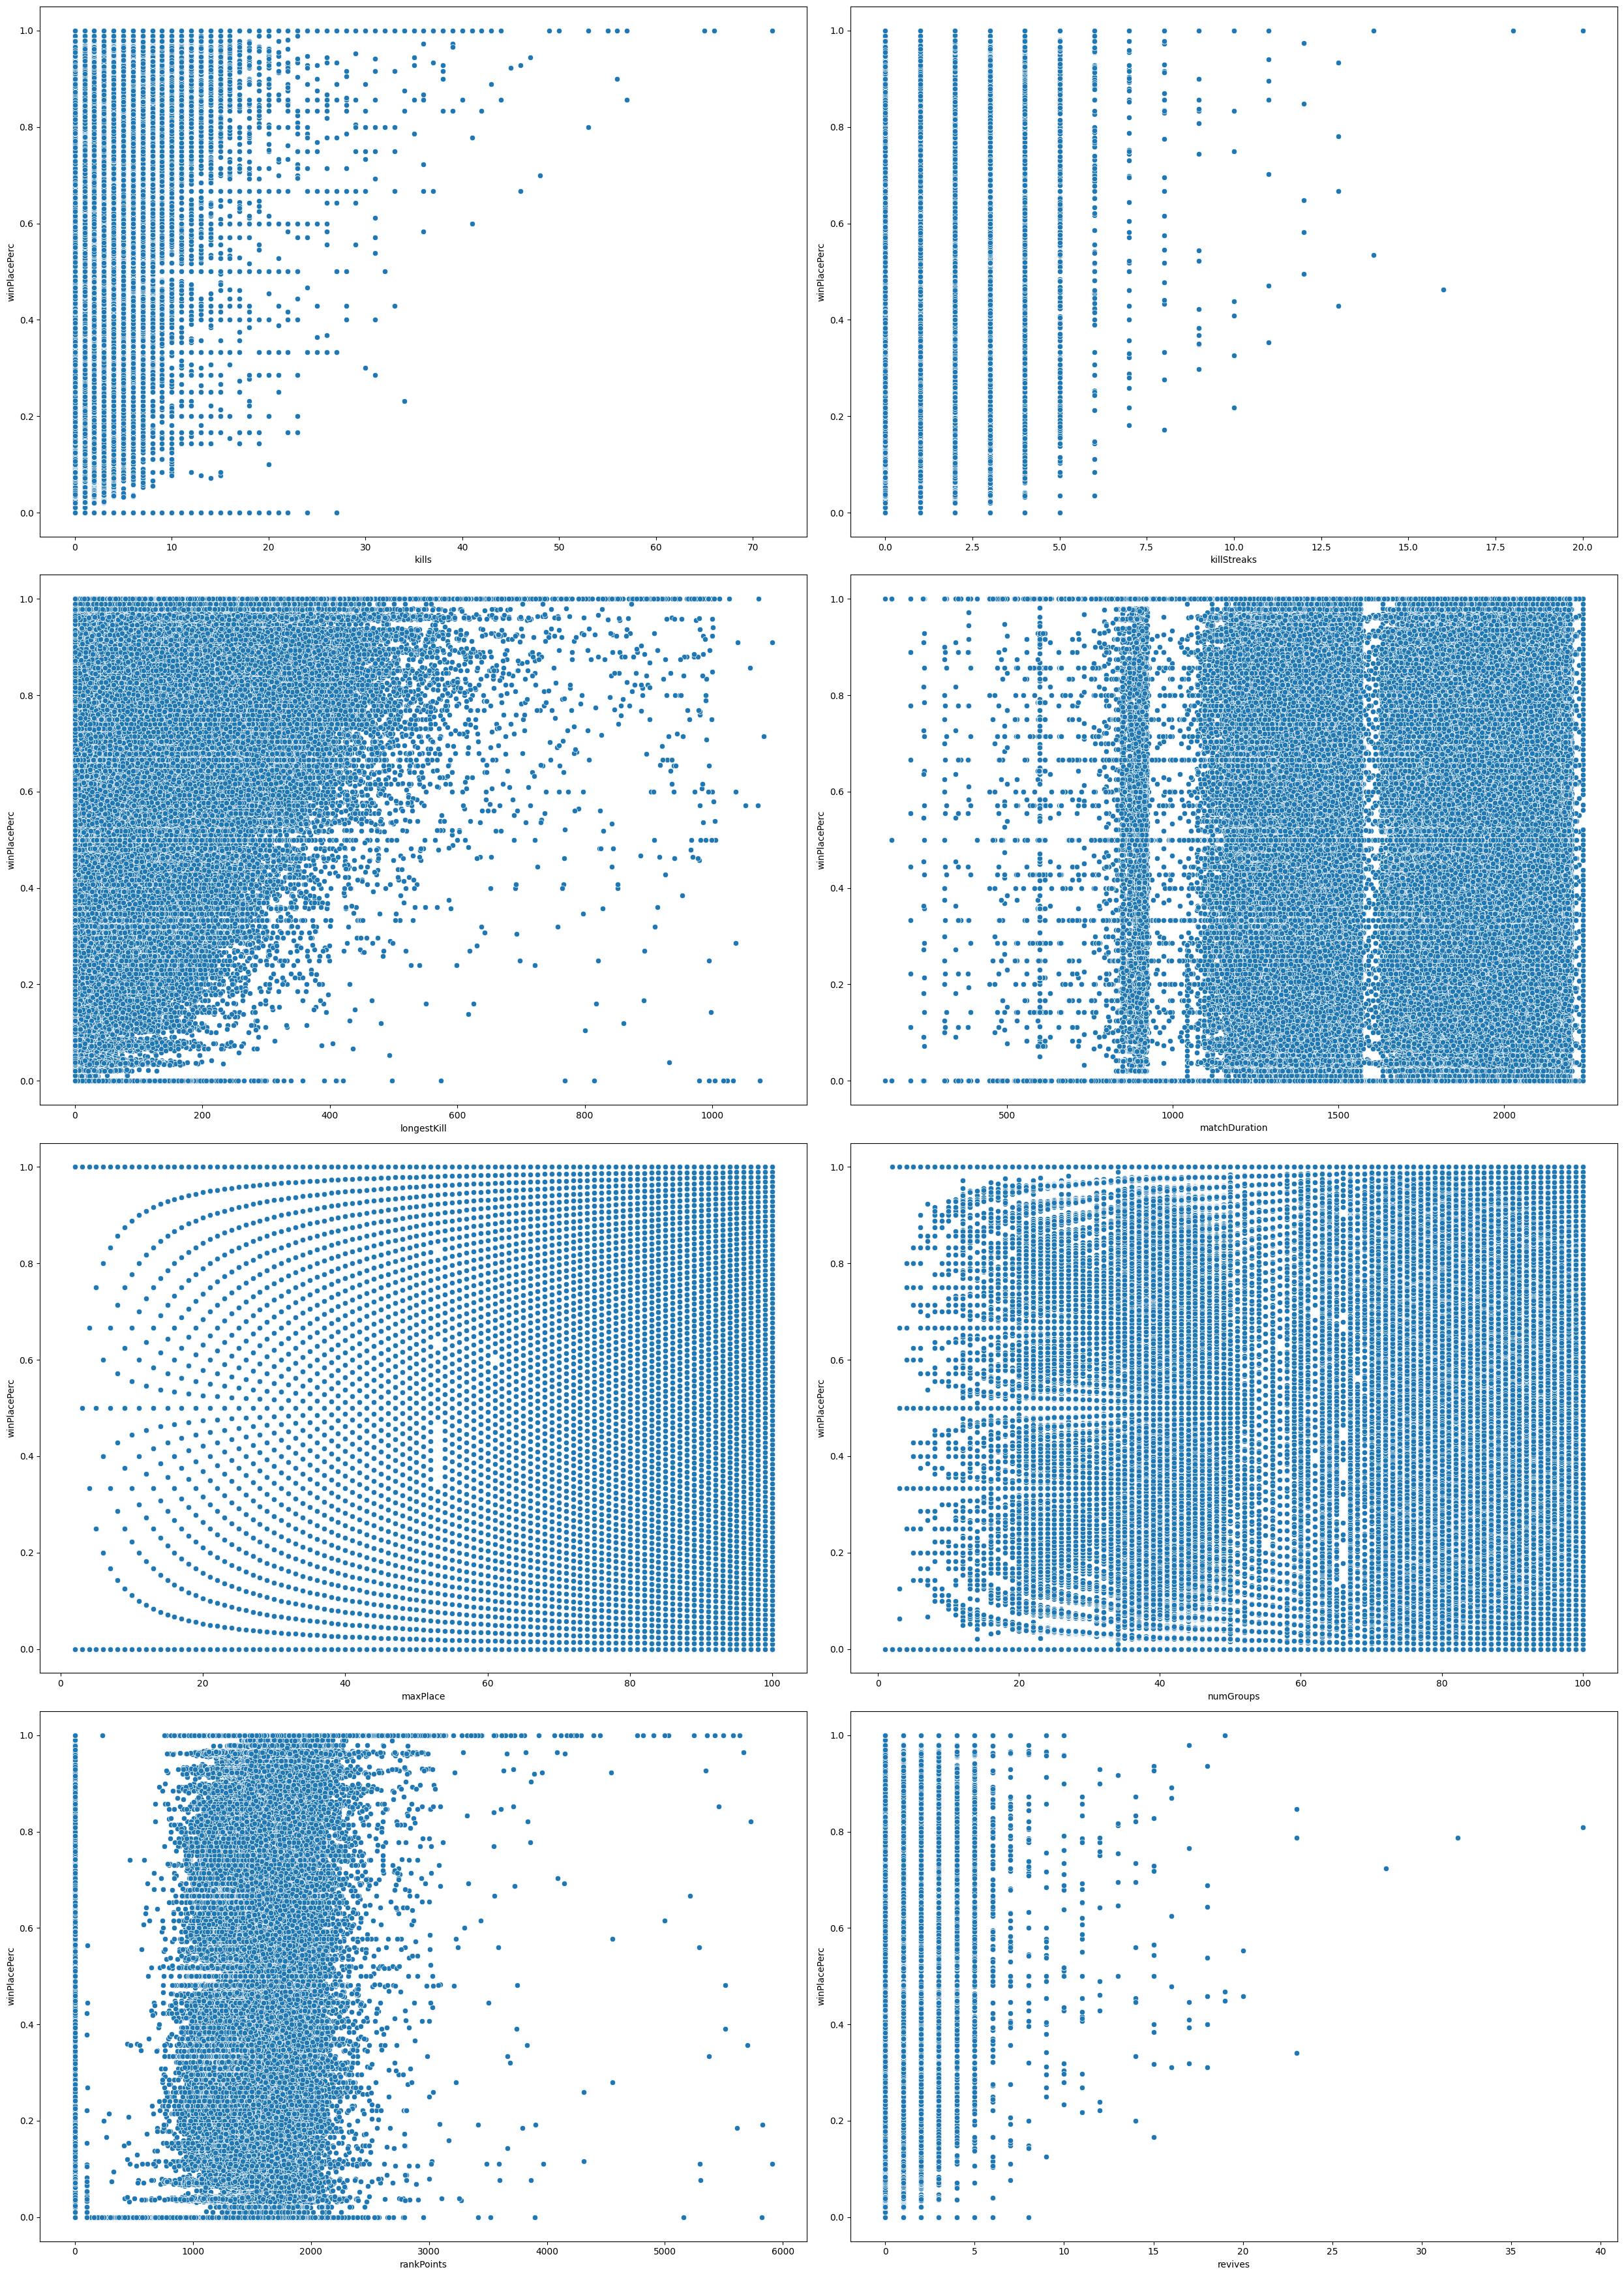

In [ ]:
plt.figure(figsize=(25,35))
plotnumber = 1

for i in df1_part_2:
    plt.subplot(4,2,plotnumber)
    sns.scatterplot(x=df1_part_2[i], y = df['winPlacePerc'])
    plotnumber = plotnumber + 1

plt.tight_layout()

**Kills** : The scatter plot shows a positive correlation between the number of kills and the win placement percentage.As players achieve more kills, their win placement percentage tends to improve. This suggests that higher kill counts are associated with better performance in terms of placement.

**KillStreaks** : Some players with low killstreaks still manage to achieve high win placement percentages, while others with high killstreaks may not perform as well.The relationship between killstreaks and winPlacePerc appears more scattered and less predictable.

**LongestKill** : As the “longestkill” distance increases, the “winPlacePerc” tends to decrease.It means players who achieve longer kill distances are less likely to win the game overall.

**MatchDuration** : Players who participate in longer matches (higher match duration) do not necessarily have better or worse winPlacePerc.The data points are densely clustered around the middle of the graph, particularly for match durations between approximately 1250 and 2000 seconds.

**MaxPlace** : As “maxPlace” increases, the “winPlacePerc” also increases, but not linearly.There is a distinct wave-like patternPlayers with higher “maxPlace” (more opponents in the match) tend to have a higher chance of winning, but the effect is not consistent across all values of “maxPlace.”

**NumGroups** : Initially, as the number of groups increases, the win place percentage also tends to increase, suggesting that players in games with more groups may have a better chance of placing higher.

**RankPoints** : A high concentration of players with low RankPoints suggests that many players are ranked lower data points at higher RankPoints above 3000 show that not many players achieve such high ranks.

**Revives** : Players with 0-10 kills tend to have more revives As the number of kills increases, the number of revives decreases, indicating that high-kill players may prioritize combat over reviving teammates.Players with many kills might be involved in intense combat, making it difficult to safely revive teammates.

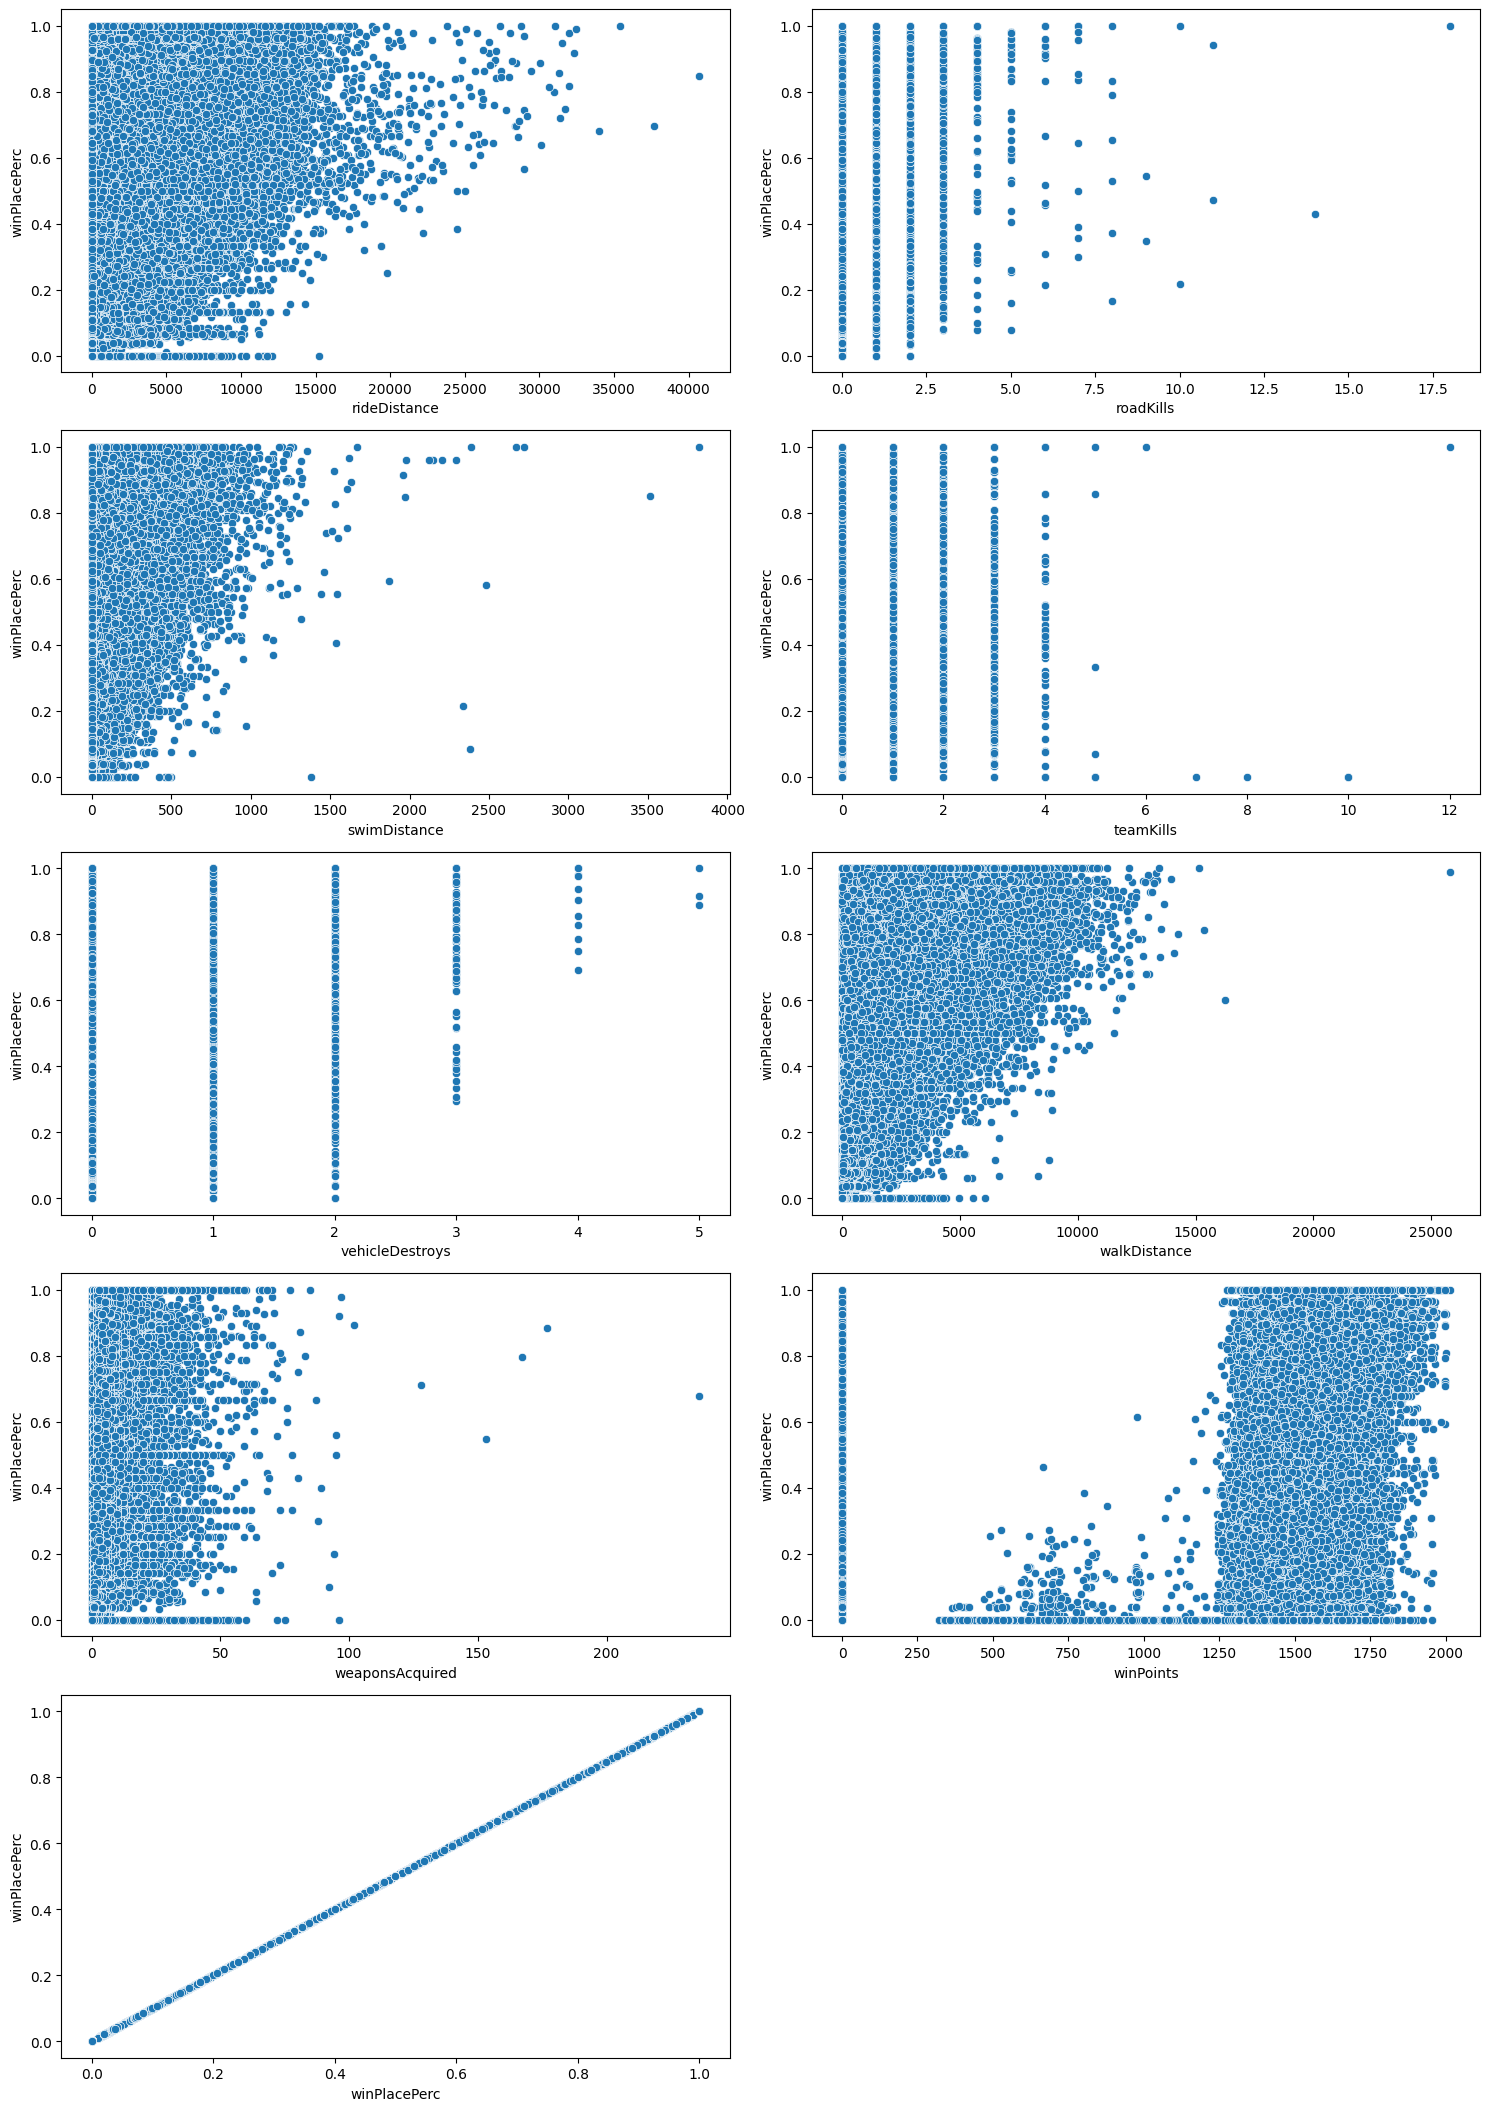

In [ ]:
plt.figure(figsize=(15,25))
plotnumber = 1

for i in df1_part_3:
    plt.subplot(6,2,plotnumber)
    sns.scatterplot(x=df1_part_3[i], y = df['winPlacePerc'])
    plotnumber = plotnumber + 1

plt.tight_layout()

**RideDistance** : The majority of players travel less than 10,000 units in vehicles, which is where the graph has the most data points.  As the distance increases beyond 10,000 units, fewer players reach these longer distances.

**Roadkills** : Roadkills are more frequent in certain matches, especially between match IDs 10 and 35.Roadkills occur at various times during the matches, as shown by the spread of dots along the y-axis.

**SwimDistance** : A large number of players have a swimDistance of less than 500 meters, with most data points clustered near zero.There is no obvious trend that suggests swimming longer distances correlates with a higher winPlacePerc.Only a small number of players manage to swim long distances, which is reflected by the sparse data points at higher swim distances.

**Team kills** : There is no evident negative correlation between team kills and win place percentage up to four team kills. This suggests that killing teammates does not have a direct impact on the chances of winning.The data points become sparse for more than four team kills, indicating such events are less common in the game. Players with zero team kills show a wide range of win place percentages, meaning that not killing teammates doesn’t guarantee a higher chance of winning

**Vehicle Destroys** : players who destroy more vehicles tend to have a higher win place percentage there is a Clusters at 0, 1, 2, and 3 vehicle destroys indicate these are common outcomes in matches. The spread of win place percentages becomes narrower with more vehicle destroys, implying a more consistent performance among players who destroy more vehicles.

**Walk Distance** : There’s a positive correlation between walkDistance and winPlacePerc. As players walk more, their chances of a higher placement increase.Many players with lower walkDistances still achieve a range of winPlacePerc, indicating that walking less does not necessarily mean a lower chance of winning.Players who cover more distance generally have a better winPlacePerc.

**Weapons Acquired** :  Players with fewer weapons acquired exhibit a wide range of win place percentages, suggesting that factors other than the number of weapons influence the chances of winning.Few players acquire a large number of weapons, and their win place percentage does not necessarily improve.

**Win Points** : points at the higher end of both axes suggests many players achieve high winPoints and winPlacePerc.An accumulation of data points at zero on both axes could represent players with low scores or placements.The spread of points shows variability in performance; some players with low winPoints still achieve high winPlacePerc and vice versa.


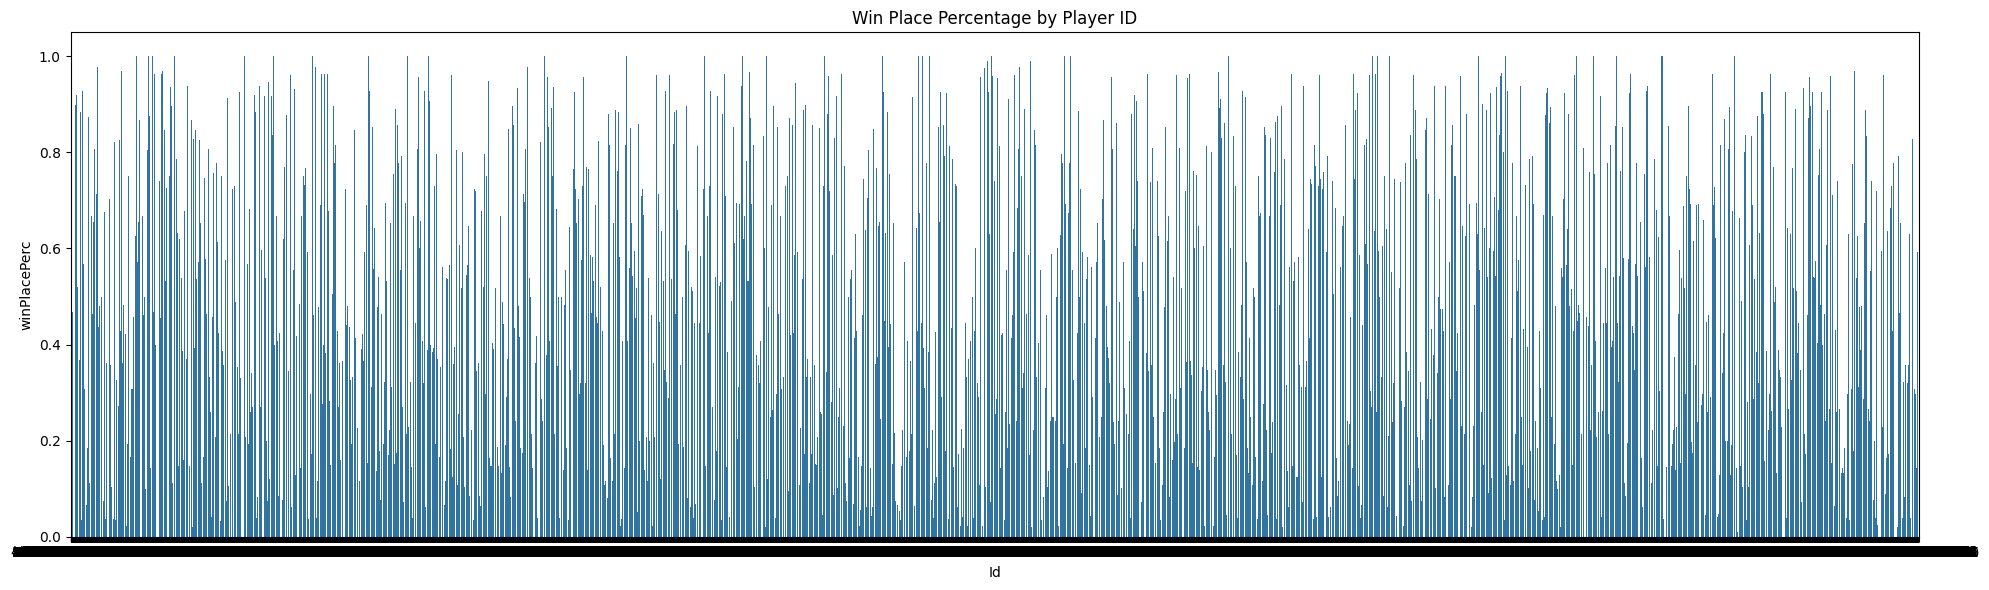

In [ ]:
plt.figure(figsize = (20,6))
sampled_df = df.sample(n=10000)  # Adjust the number based on your dataset size
sns.barplot(x=sampled_df['Id'], y=sampled_df['winPlacePerc'])
plt.title('Win Place Percentage by Player ID')  # Adding title
plt.tight_layout()
plt.show()

The graph exhibits a wide range of win percentages, suggesting significant variability in player performance.
Some players consistently achieve high win rates (visible as tall, dark lines), while others struggle (short, light lines).  Clusters of similar-colored lines may indicate groups of players with similar performance levels.

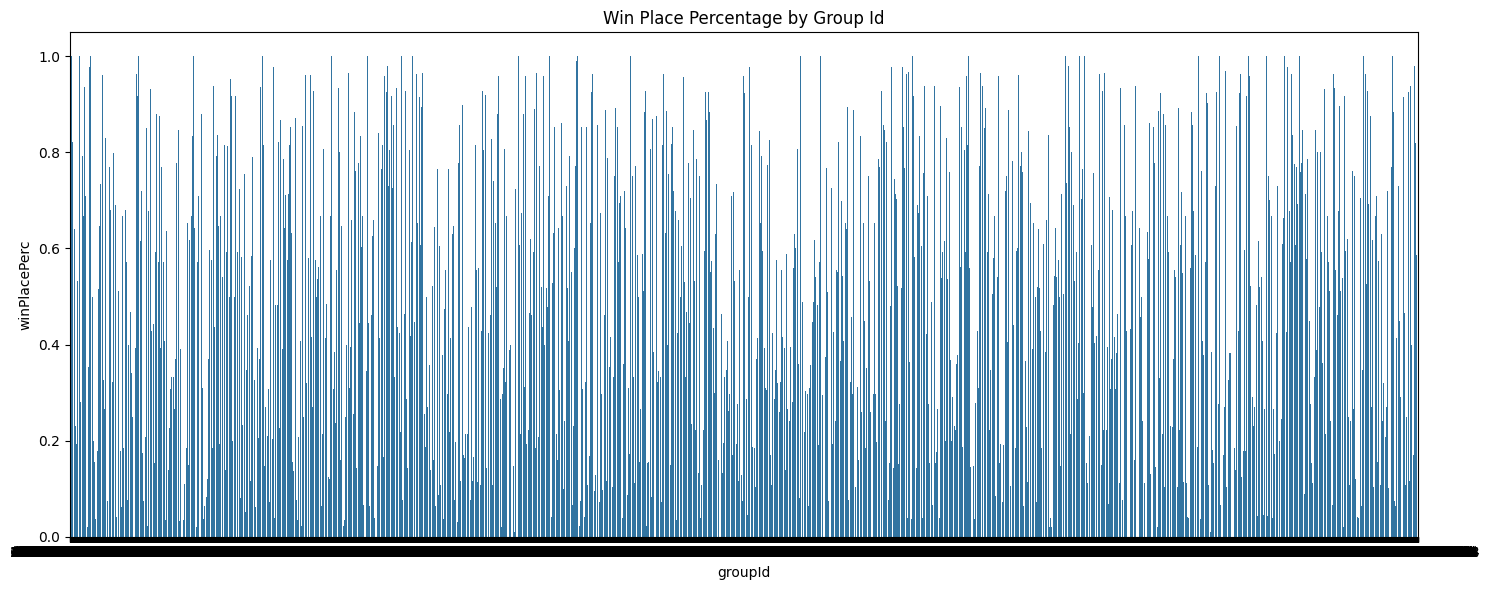

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x=sampled_df['groupId'], y=sampled_df['winPlacePerc'])
plt.title('Win Place Percentage by Group Id')  # Adding title
plt.tight_layout()
plt.show()

The graph shows a wide distribution of winPlacePerc across various group IDs.
There isn’t a strong correlation between groupId and winning percentage.
Some groups consistently achieve high win rates (visible as tall, dark lines), while others have lower performance (short, light lines).

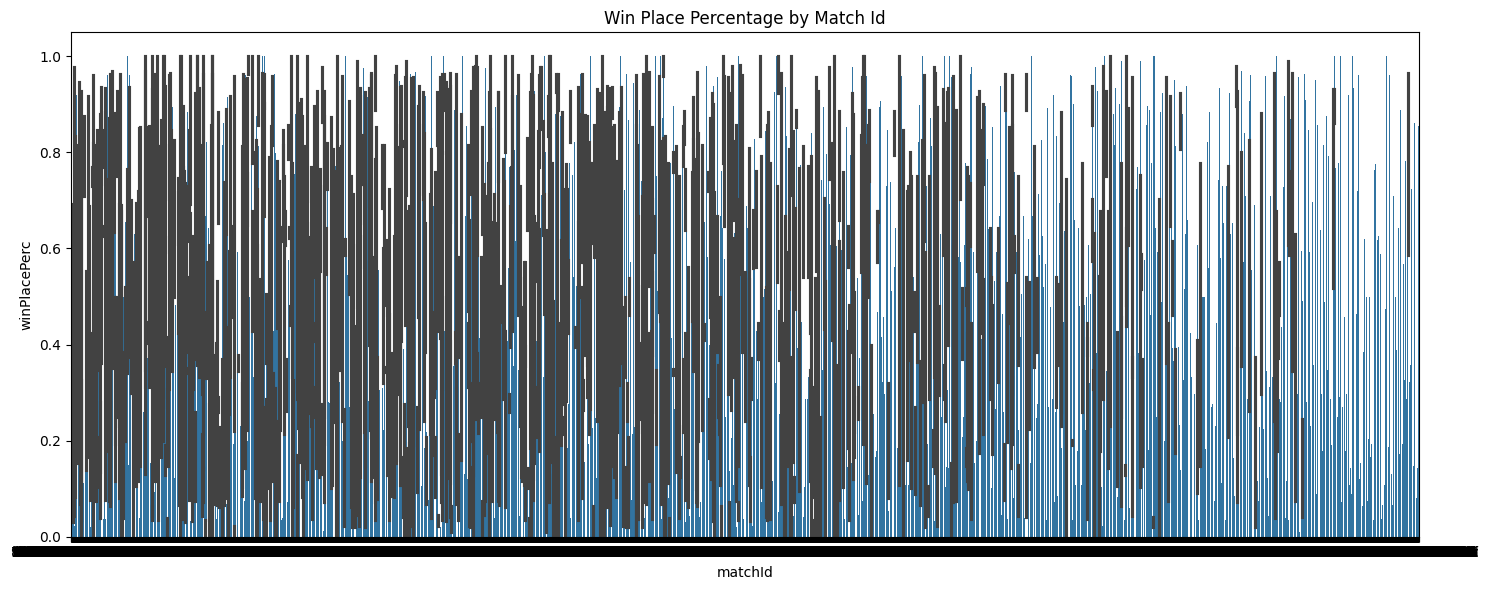

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x=sampled_df['matchId'], y=sampled_df['winPlacePerc'])
plt.title('Win Place Percentage by Match Id')  # Adding title
plt.tight_layout()
plt.show()

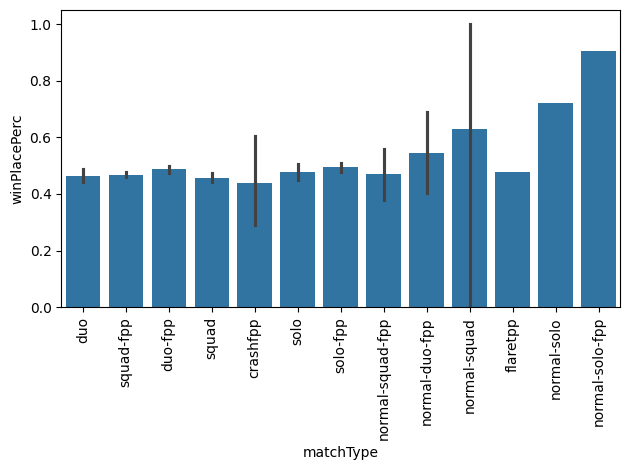

In [ ]:
sns.barplot(x=sampled_df['matchType'], y=sampled_df['winPlacePerc'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph reveals that squad matches tend to have higher win percentages compared to other match types.
Solo matches exhibit lower win percentages, suggesting that individual play is more challenging.
Duo matches fall in between, indicating a balanced performance.

### Data Preprocessing

In [19]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

As we have one null value in winPlacePerc we will drop that row.

In [20]:
df[df['winPlacePerc'].isnull()]

Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2744604          0.0      0              0      0          1  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
2744604           0.0          0           0.0          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
2744604           0.0                0          0           NaN  

[1 rows x 29 columns]

In [21]:
df.drop(2744604,inplace=True)

### Handling Outliers

In each match only 100 players can play . Let's check players in each match and drop if outliers(players more than 100) are present.

In [22]:
a=df.groupby('matchId')['matchType'].count()
a

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
                 ... 
fffd74b5150cb4     97
fffe53015be300     97
fffe562611d981     94
fffe721f841f85     97
fffe92232706aa     93
Name: matchType, Length: 47964, dtype: int64

In [23]:
(a>100).sum()

0

In [24]:
#If a want to know the total distance covered by the player in a match we will add 3 columns Ride datance, Walk Distance, Swim Distance.
df['totalDistancetravelled']=df['rideDistance']+df['walkDistance']+df['swimDistance']
print('totalDistancetravelled :', df['totalDistancetravelled'])
print('=======================================================')

#We are combining no.of healing ad boosting items used by players.
df['heals_boosts']=df['boosts']+df['heals']
print('heals_boosts :', df['heals_boosts'])
print('========================================================')

#Headshot kills also come under kills so we are dividing headshot kills by kills.
df['headshots']=df['headshotKills']/df['kills']
print(df['headshots'])

totalDistancetravelled : 0           244.800003
1          1445.044556
2           161.800003
3           202.699997
4            49.750000
              ...     
4446961    2311.000000
4446962      81.699997
4446963     790.884033
4446964    2748.000000
4446965    2613.000000
Name: totalDistancetravelled, Length: 4446965, dtype: float32
heals_boosts : 0          0
1          0
2          0
3          0
4          0
          ..
4446961    0
4446962    1
4446963    0
4446964    6
4446965    3
Name: heals_boosts, Length: 4446965, dtype: int8
0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshots, Length: 4446965, dtype: float64


In [25]:
#A player cannot kill a person without moving from his place . So we are considering these players as outliers and removing it.
df['kills_without_moving'] = ((df['kills'] > 0) & (df['totalDistancetravelled'] == 0))

print(df['kills_without_moving'].value_counts())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df[df['kills_without_moving'] == True].shape)

kills_without_moving
False    4445430
True        1535
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(1535, 33)


In [26]:
df.drop(df[df['kills_without_moving'] == True].index,inplace = True)
print(df[df['kills_without_moving'] == True].shape)

(0, 33)


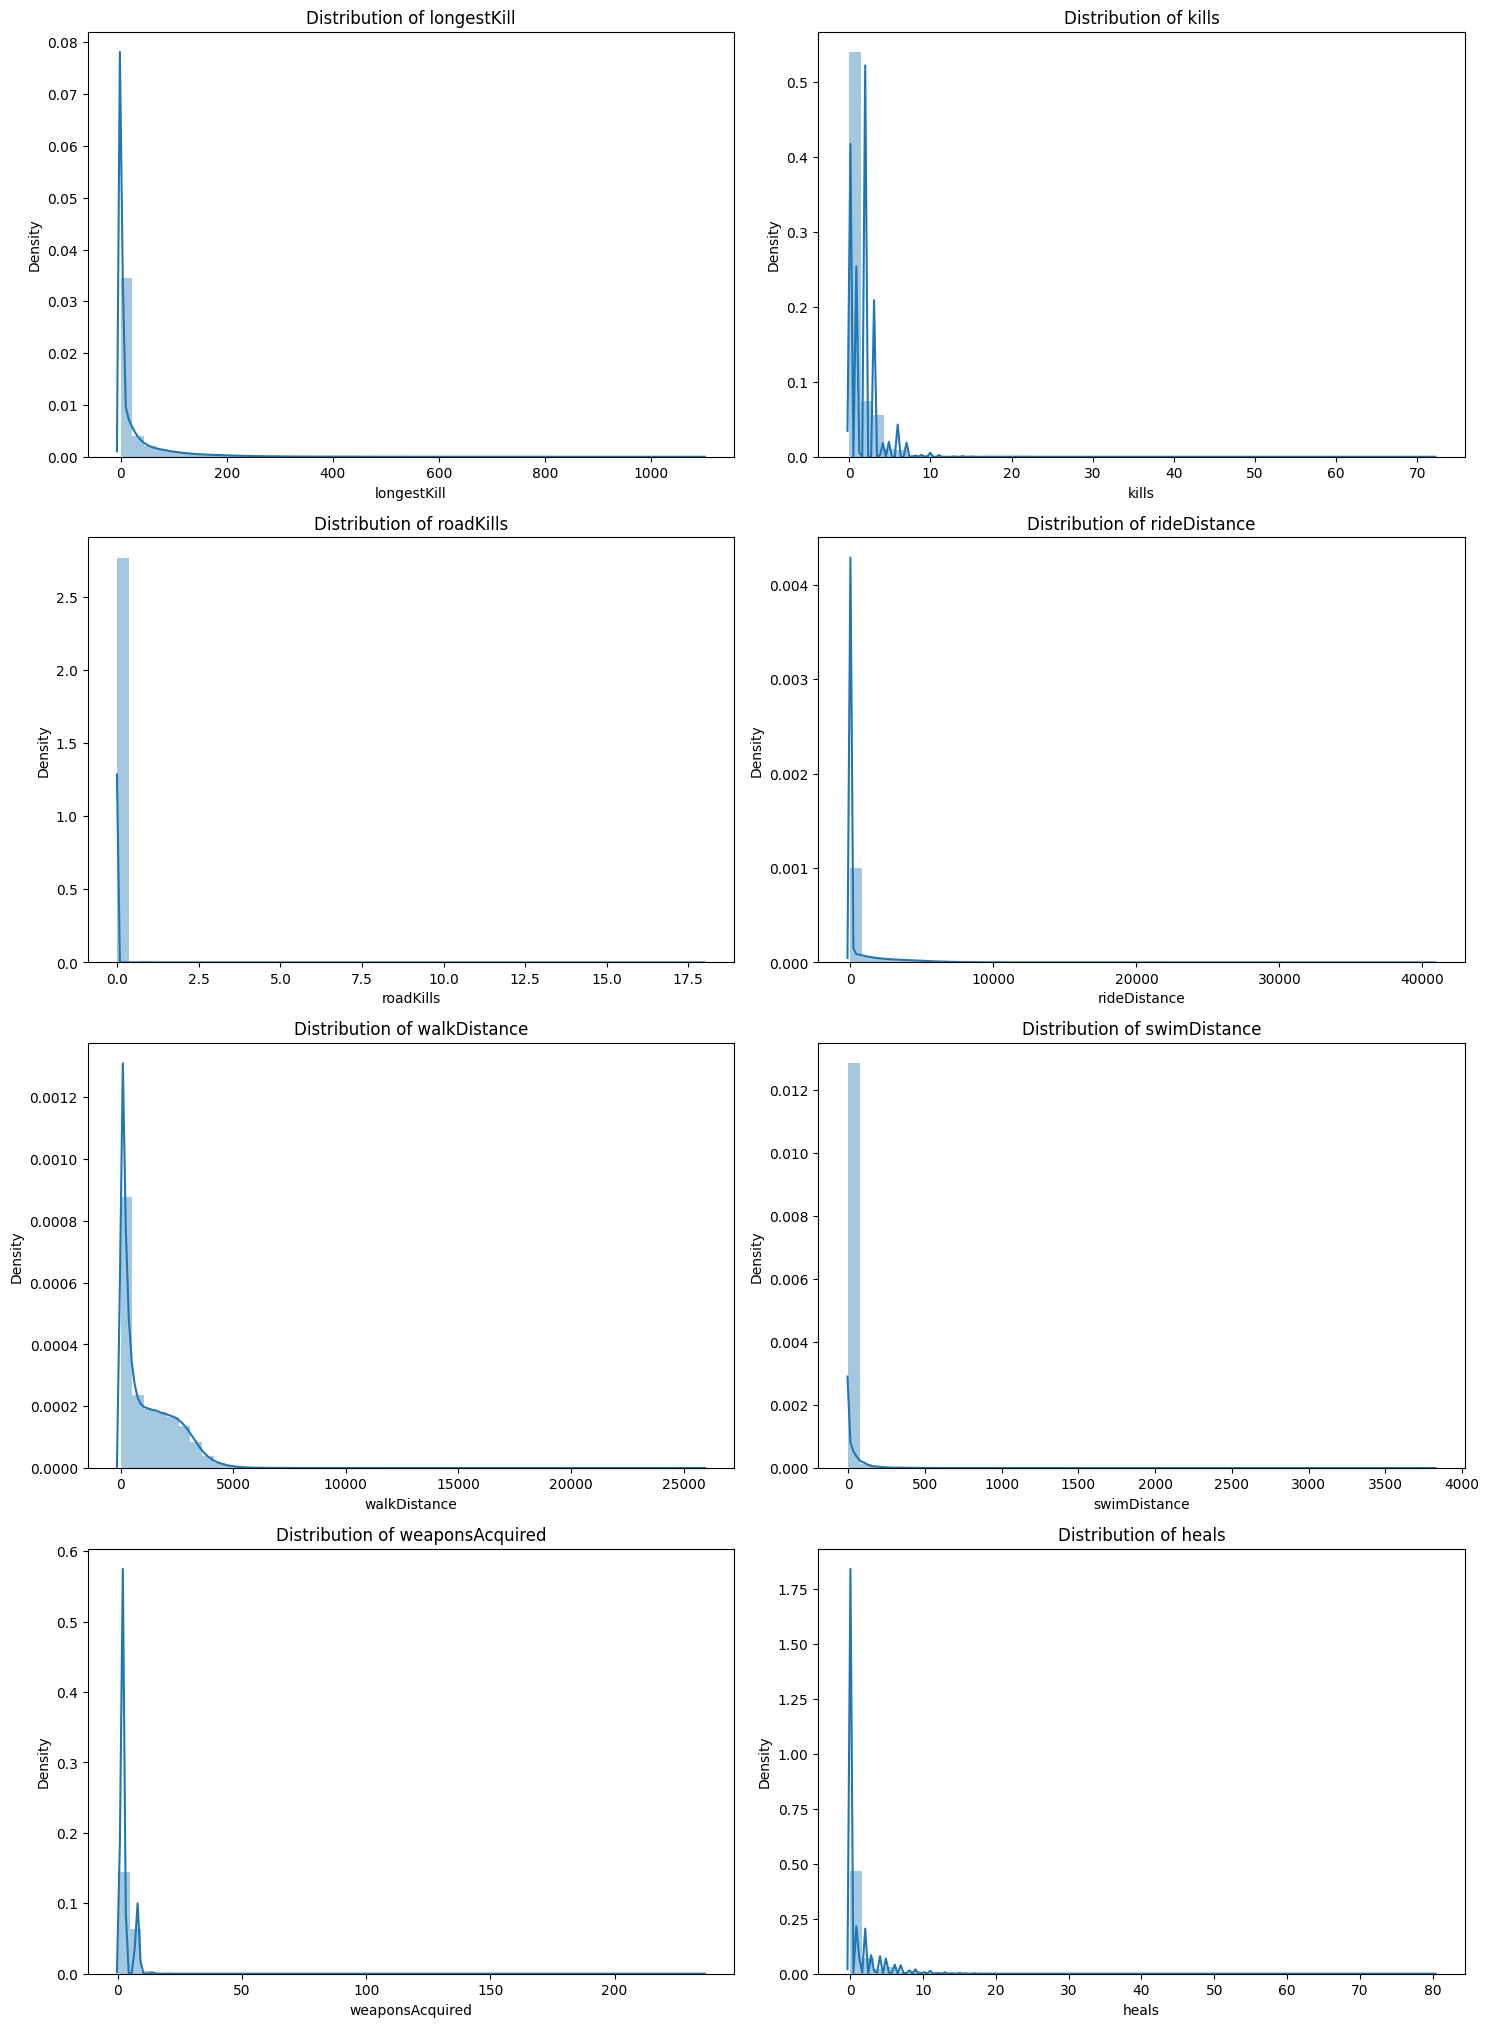

In [ ]:
outliers= df[['longestKill', 'kills', 'roadKills', 'rideDistance',
                   'walkDistance', 'swimDistance',
                   'weaponsAcquired', 'heals']]

plt.figure(figsize=(15,25))
plotnumber = 1

for i in outliers:
    plt.subplot(5, 2, plotnumber)
    sns.distplot(outliers[i])  # Corrected this line
    plt.title(f'Distribution of {i}')  # Added title
    plotnumber += 1

plt.tight_layout()
plt.show()

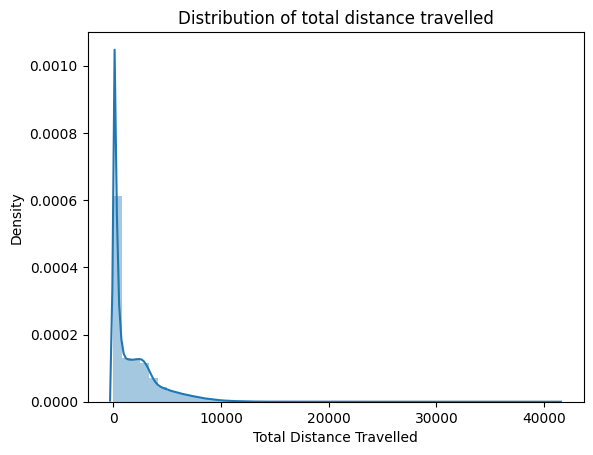

In [ ]:
sns.distplot(df['totalDistancetravelled'])
plt.title('Distribution of total distance travelled')
plt.xlabel('Total Distance Travelled')
plt.ylabel('Density')
plt.show()

In [27]:
print("longestKill >= 900:   ", df[df['longestKill'] >= 900].shape)
print("roadKills >= 10:      ", df[df['roadKills'] >= 10].shape)
print("kills >= 30:          ", df[df['kills'] >= 30].shape)
print("rideDistance >= 10000:", df[df['rideDistance'] >= 10000].shape)
print("walkDistance >= 10000:", df[df['walkDistance'] >= 10000].shape)
print("swimDistance >= 500  :", df[df['swimDistance'] >= 500].shape)
print("totalDistancetravelled>=12500:", df[df['totalDistancetravelled'] >= 12500].shape)
print("weaponsAcquired >= 50:", df[df['weaponsAcquired'] >= 50].shape)
print("heals >= 40:          ", df[df['heals'] >= 40].shape)

longestKill >= 900:    (140, 33)
roadKills >= 10:       (6, 33)
kills >= 30:           (106, 33)
rideDistance >= 10000: (6327, 33)
walkDistance >= 10000: (219, 33)
swimDistance >= 500  : (2617, 33)
totalDistancetravelled>=12500: (5051, 33)
weaponsAcquired >= 50: (162, 33)
heals >= 40:           (135, 33)


In [28]:
#Most kills are made a distance of900m of closer. There are however some ouyliers who make kill from more than 900m  away. This is probably done by cheaters.
df.drop(df[df['longestKill'] >= 900].index ,inplace = True)
df.drop(df[df['roadKills']>=10].index,inplace = True)
df.drop(df[df['kills']>=30].index,inplace = True)
df.drop(df[df['rideDistance']>=10000].index,inplace = True)
df.drop(df[df['walkDistance']>=10000].index,inplace = True)
df.drop(df[df['swimDistance']>=500].index,inplace = True)
df.drop(df[df['totalDistancetravelled']>=12500].index,inplace = True)
df.drop(df[df['weaponsAcquired']>=50].index,inplace = True)
df.drop(df[df['heals']>=40].index,inplace = True)

In [29]:
print("longestKill >= :         ", df[df['longestKill'] >= 900].shape)
print("roadKills >= :           ", df[df['roadKills'] >= 10].shape)
print("kills >= :               ", df[df['kills'] >= 30].shape)
print("rideDistance >= :        ", df[df['rideDistance'] >= 10000].shape)
print("walkDistance >= :        ", df[df['walkDistance'] >= 10000].shape)
print("swimDistance >=   :      ", df[df['swimDistance'] >= 500].shape)
print("totalDistancetravelled>=:", df[df['totalDistancetravelled'] >= 12500].shape)
print("weaponsAcquired >= :     ", df[df['weaponsAcquired'] >= 50].shape)
print("heals >= :               ", df[df['heals'] >= 40].shape)

longestKill >= :          (0, 33)
roadKills >= :            (0, 33)
kills >= :                (0, 33)
rideDistance >= :         (0, 33)
walkDistance >= :         (0, 33)
swimDistance >=   :       (0, 33)
totalDistancetravelled>=: (0, 33)
weaponsAcquired >= :      (0, 33)
heals >= :                (0, 33)


In [30]:
df.shape

(4434854, 33)

In [31]:
df.drop(['totalDistancetravelled','heals_boosts', 'headshots', 'kills_without_moving'],axis=1,inplace=True)

### Encoding

Encoding means conversion of categorical data to numerical data as machine doesn't understand alphabets.

In [32]:
df.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [33]:
df.matchType.value_counts()

matchType
squad-fpp           1752780
duo-fpp              994928
squad                624613
solo-fpp             535276
duo                  312714
solo                 181078
normal-squad-fpp      15950
crashfpp               6285
normal-duo-fpp         5352
flaretpp               2483
normal-solo-fpp        1408
flarefpp                718
normal-squad            439
crashtpp                371
normal-solo             269
normal-duo              190
Name: count, dtype: int64

In [34]:
df['matchType'] = df['matchType'].map({'squad-fpp':0,'duo-fpp':1,'squad':2,'solo-fpp':3,'duo':4,'solo':5,'normal-squad-fpp':6,'crashfpp':7,'normal-duo-fpp':8,'flaretpp':9,'normal-solo-fpp':10,'flarefpp':11,'normal-squad':12,'crashtpp':13,'normal-solo':14,'normal-duo':15})

### Feature Selection

In [35]:
b=df[['Id','matchId','groupId','winPlacePerc']]

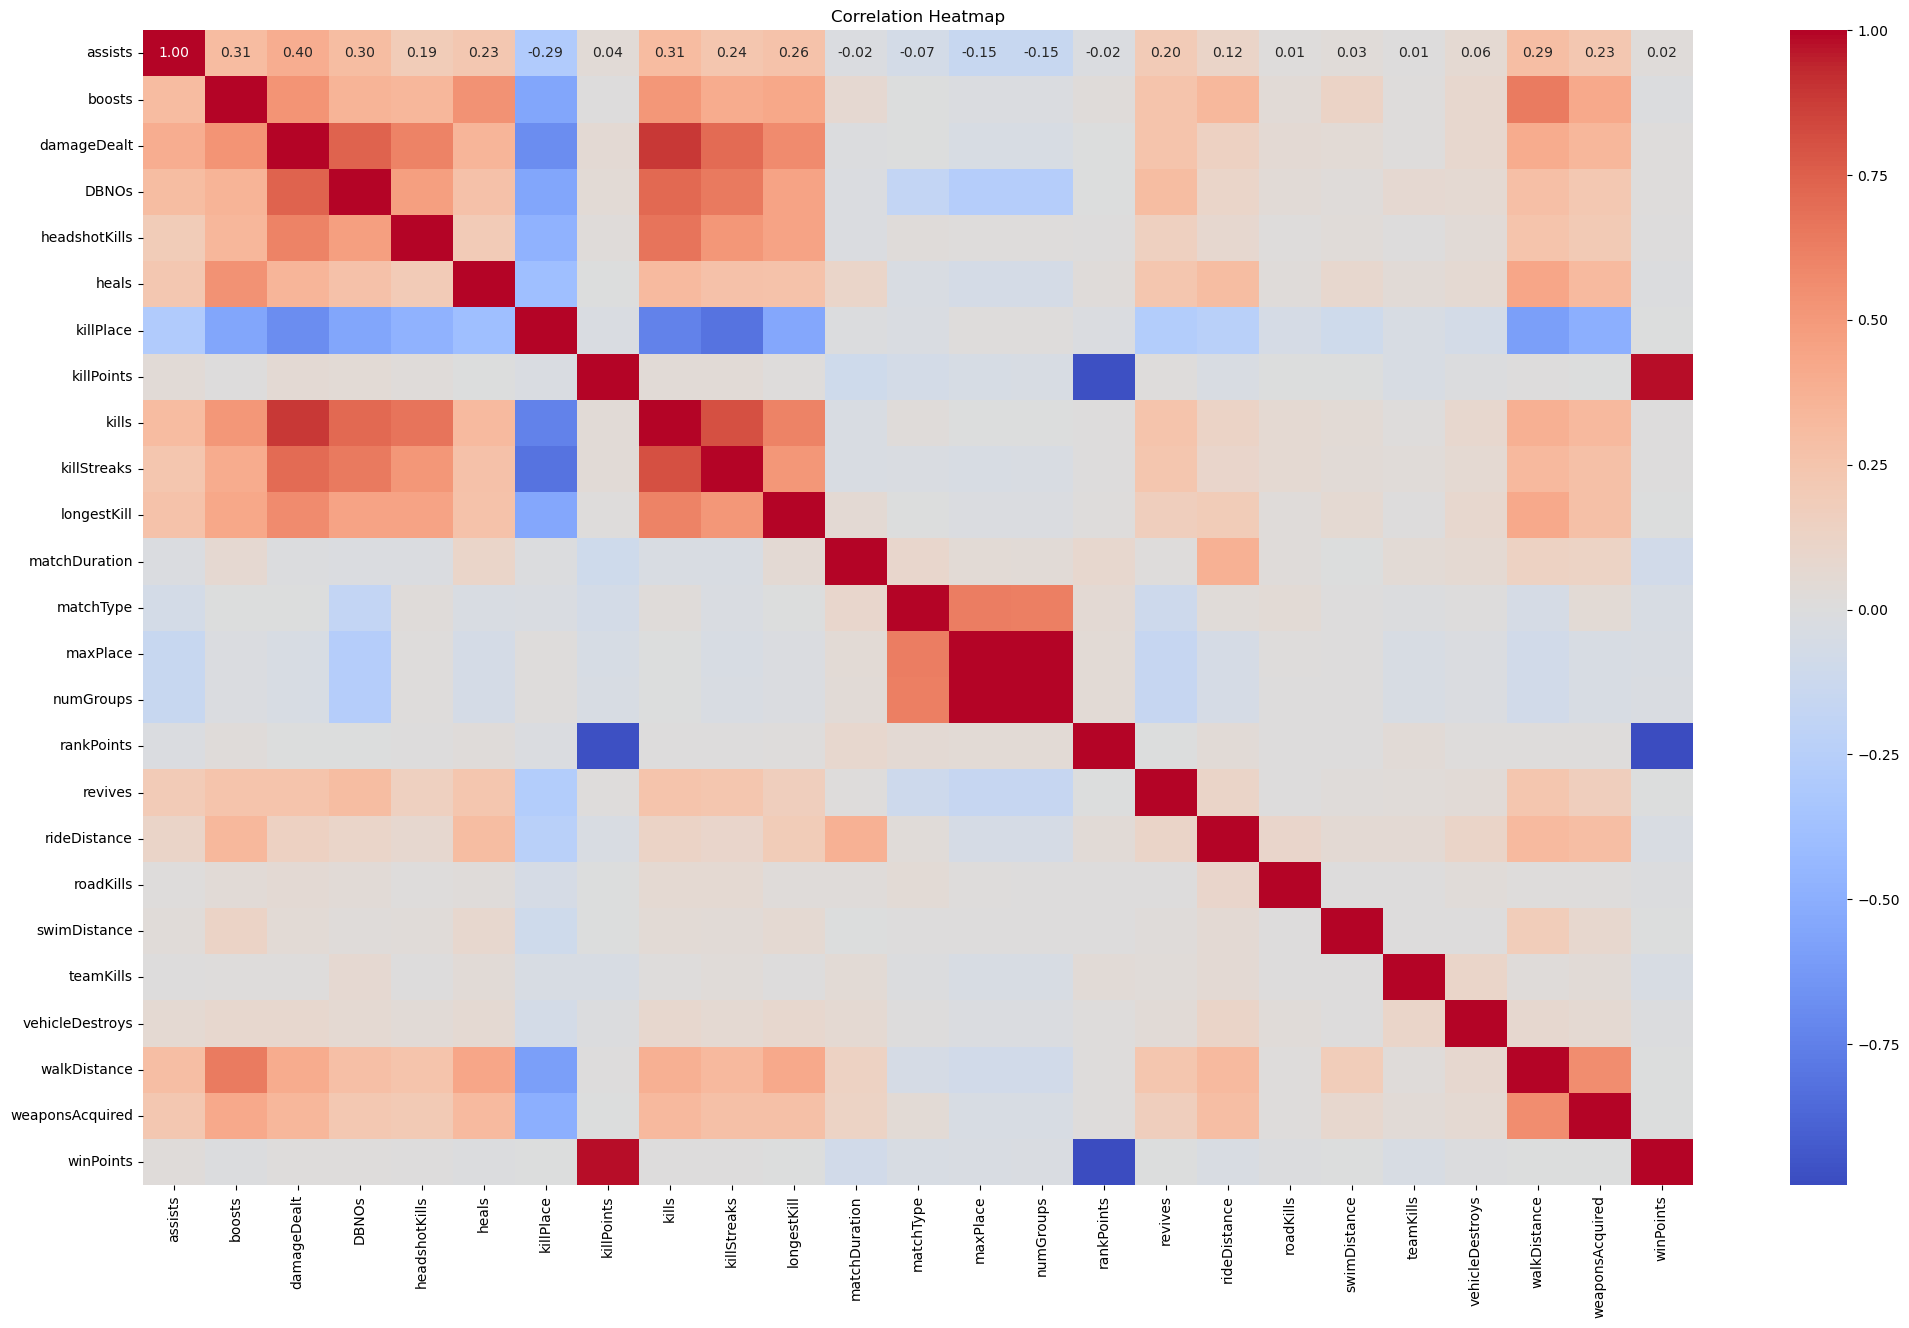

In [36]:
plt.figure(figsize=(25, 15))  # Increase the size of the heatmap
heatmap = sns.heatmap(df.drop(b, axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Adjust font size as needed
heatmap.set_title('Correlation Heatmap')

plt.show()

In the above heatmap (MaxPlace & Numgroups) & (Winpoints & Killpoints) are highly correlated. When correlation between any two columns is >90%, we need to drop any one column .We are choosing to drop Maxplace & killpoints.

In [37]:
df.drop(['maxPlace','killPoints','rankPoints','winPoints'],axis=1,inplace=True)

In [38]:
df.drop(['Id','matchId','groupId'],axis=1,inplace=True)

# Task - 2

## Model Creation

We're selecting a sample of 1,00,000 data points from our large dataset for training and testing purposes. By working with this subset, we aim to expedite the analysis process, alleviate computational constraints, and streamline model development. Additionally, this approach ensures that our models are trained and evaluated on a representative portion of the data, enhancing their generalization performance.

In [39]:
sample =100000
df_sample = df.sample(sample) 

In [40]:
x=df_sample.drop('winPlacePerc',axis=1)
y=df_sample['winPlacePerc']

print(x.shape)
print(y.shape)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

## Model Evaluation

### 1. Linear Regression

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [45]:
LR=LinearRegression()
LR.fit(x_train,y_train)

### 1.Training data

In [47]:
y_train_pred=LR.predict(x_train)
train_score=r2_score(y_train,y_train_pred)
train_adjusted_r2=1-(1-train_score)*(60000-1)/(60000-21-1)

print('R2_score :',train_score)
print('Adjusted_r2_score:',train_adjusted_r2)

print('Mean_squared_error :',mean_squared_error(y_train,y_train_pred))
print('Mean_absolute_error :',mean_absolute_error(y_train,y_train_pred))
print('Root_mean_squared_error :',math.sqrt(mean_squared_error(y_train,y_train_pred)))


R2_score(a1): 0.8318996816173372
Adjusted_r2_score: 0.8318408249251161
Mean_squared_error : 0.0158180960585702
Mean_absolute_error : 0.09246515854881371
Root_mean_squared_error : 0.1257700125569295


### 2.Testing Data

In [48]:
y_test_pred=LR.predict(x_test)
test_score=r2_score(y_test,y_test_pred)
test_adjusted_r2=1-(1-test_score)*(40000-1)/(40000-21-1)

print('R2_score :',test_score)
print('Adjusted_r2_score:',test_adjusted_r2)

print('Mean_squared_error :',mean_squared_error(y_test,y_test_pred))
print('Mean_absolute_error :',mean_absolute_error(y_test,y_test_pred))
print('Root_mean_squared_error :',math.sqrt(mean_squared_error(y_test,y_test_pred)))



R2_score(b1): 0.828643197385083
Adjusted_r2_score: 0.8285531855572048
Mean_squared_error : 0.01619747980385002
Mean_absolute_error : 0.09321288125905469
Root_mean_squared_error : 0.1272693199630218


### 2.Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)

In [50]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

### 1.Training Data

In [51]:
y_train_pred_dt=DT.predict(x_train)
train_score_dt=r2_score(y_train,y_train_pred_dt)
adjusted_r2_score_dt=1-(1-train_score_dt)*(60000-1)/(60000-21-1)

print('R2_score :',train_score_dt)
print('Adjusted_R2_score:',adjusted_r2_score_dt)
print('Mean_squared_error:',mean_squared_error(y_train,y_train_pred_dt))
print('Mean_absolute_error:',mean_absolute_error(y_train,y_train_pred_dt))
print('Root_mean_squared_error:',math.sqrt(mean_squared_error(y_train,y_train_pred_dt)))

R2_score(a2): 0.9999998945925639
Adjusted_R2_score: 0.9999998945556577
Mean_squared_error: 9.91874950304628e-09
Mean_absolute_error: 5.749999855955442e-07
Root_mean_squared_error: 9.959291894028551e-05


### 2.Testing Data

In [52]:
y_test_predict_DT=DT.predict(x_test)
test_score_DT=r2_score(y_test,y_test_predict_DT)
test_adjusted_r2_DT = 1-(1-test_score_DT)*(40000-1)/(40000-21-1)

print("R2_score:",test_score_DT)
print("adjusted r2 score :",test_adjusted_r2_DT)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_DT))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_DT)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_DT))

R2_score: 0.828291398683819
adjusted r2 score : 0.8282012020599848
mean_squared_error : 0.01623073353099589
root mean squared_error: 0.12739989611846586
mean_absolute_error: 0.08879562984269578


## 3.RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RF = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')
RF.fit(x_train,y_train)

## 1.Training Data

In [56]:
y_train_predict_RF=RF.predict(x_train)
train_score_RF=r2_score(y_train,y_train_predict_RF)# Checking R2_score on training

train_adjusted_r2_RF = 1-(1-train_score_RF)*(60000-1)/(60000-21-1) ## CHecking adjusted r2 score for training data

print("R2_score:",train_score_RF)
print("adjusted r2 score :",train_adjusted_r2_RF)
print("mean_squared_error :",mean_squared_error(y_train,y_train_predict_RF))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_train_predict_RF)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_predict_RF))

R2_score: 0.897691693436445
adjusted r2 score : 0.8976558723947657
mean_squared_error : 0.009627124067237154
root mean squared_error: 0.09811790900359196
mean_absolute_error: 0.07174778517786175


## 2.Teating Data

In [57]:
y_test_predict_RF=RF.predict(x_test)
test_score_RF=r2_score(y_test,y_test_predict_RF)

test_adjusted_r2_RF = 1-(1-test_score_RF)*(40000-1)/(40000-21-1)


print("R2_score:",test_score_RF)
print("adjusted r2 score :",test_adjusted_r2_RF)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_RF))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_RF)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_RF))

R2_score: 0.882804877233512
adjusted r2 score : 0.8827433159353456
mean_squared_error : 0.011077853958245286
root mean squared_error: 0.10525138459063275
mean_absolute_error: 0.07662208726664214


## 4.KNN

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [59]:
Error_rate=[]

for i in range(1,15):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate=(y_test != y_pred).sum()/len(y_test)
    Error_rate.append(error_rate)

Error_rate

Text(0.5, 1.0, 'k v/s error_rate')

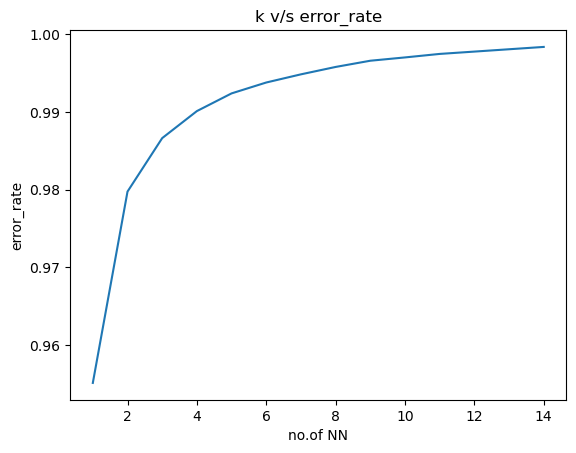

In [61]:
plt.plot(range(1,15),Error_rate)
plt.xlabel('no.of NN')
plt.ylabel('error_rate')
plt.title('k v/s error_rate')

In [62]:
knn1=KNeighborsRegressor(n_neighbors=4)
knn1.fit(x_train,y_train)

### 1.Training Data

In [64]:
y_pred_train_knn=knn1.predict(x_train)
train_score_knn = r2_score(y_train, y_pred_train_knn)

train_adjusted_r2_knn = 1-(1-train_score_knn)*(60000-1)/(60000-21-1) 

print("R2_score:",train_score_knn)
print("adjusted r2 score :",train_adjusted_r2_knn)
print("mean_squared_error :",mean_squared_error(y_train,y_pred_train_knn))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_pred_train_knn))

R2_score: 0.887627030348614
adjusted r2 score : 0.8875876853827486
mean_squared_error : 0.010574199
root mean squared_error: 0.10283092559770703
mean_absolute_error: 0.07385665


### 2.Testing data

In [65]:
y_test_predict_knn=knn1.predict(x_test)
test_score_knn=r2_score(y_test,y_test_predict_knn)

test_adjusted_r2_knn = 1-(1-test_score_knn)*(40000-1)/(40000-21-1)


print("R2_score:",test_score_knn)
print("adjusted r2 score :",test_adjusted_r2_knn)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_knn))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_knn)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_knn))

R2_score: 0.8051921584296409
adjusted r2 score : 0.8050898280310972
mean_squared_error : 0.018414186
root mean squared_error: 0.13569888103351613
mean_absolute_error: 0.097674526


## Hyperperameter Tuning

## 1. Decision Tree

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

param_dist = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# model
DT1 = DecisionTreeRegressor()


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=DT1, param_distributions=param_dist, cv=5, n_iter=5)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

best_model = random_search.best_estimator_

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


### 1.Testing Data

In [68]:
y_test_predict_DT=best_model.predict(x_test)
test_score_DT=r2_score(y_test,y_test_predict_DT)

test_adjusted_r2_DT = 1-(1-test_score_DT)*(40000-1)/(40000-21-1)


print("R2_score:",test_score_DT)
print("adjusted r2 score :",test_adjusted_r2_DT)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_DT))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_DT)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_DT))

R2_score: 0.8869234859733219
adjusted r2 score : 0.8868640881346467
mean_squared_error : 0.010688542995009416
root mean squared_error: 0.1033854099716658
mean_absolute_error: 0.07239567969867526


### Models Prediction

In [88]:
Model = pd.DataFrame({ 'Models': ['Linear Regression','Decision Tree',' Random Forest','KNN'],
'Train Score (R2)': [train_score,train_score_dt,train_score_RF ,train_score_knn],
'Test Score (R2)' : [test_score,test_score_DT,test_score_RF,test_score_knn]
})

In [89]:
Model

Models  Train Score (R2)  Test Score (R2)
0  Linear Regression          0.833051         0.828948
1      Decision Tree          0.907806         0.886716
2      Random Forest          0.897007         0.884457
3                KNN          0.886893         0.805326

### Conclusion

### Decision Tree: 
### It shows high accuracy both in training and testing data, with scores of 0.907806 and 0.886716 respectively. This suggests that the model generalizes well to unseen data.
### Random Forest: 
### Similarly, Random Forest also exhibits strong performance with scores of 0.897007 for training data and 0.884457 for testing data. While the testing accuracy is slightly lower than the Decision Tree, it's still robust.

# Challanges faced


### We Faced the issues with our dataset being excessively large, leading to extended processing times when running code and generating graphs.
### Even basic operations on the system were sluggish, and model training took anywhere from 30 minutes to over an hour.

### While large datasets often yield more accurate model predictions across various algorithms, we've come to realize that the current dataset size may be more than sufficient for our needs."